# **Exploratory Data Analysis (EDA)**



# **1. Import libraries**

In [6]:
import numpy as np ## pip install numpy==2.1 #need this to run ydata-profiling
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency # filter method
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from pathlib import Path


# **2. Import data and apply first pre-processing**

At this point the dataframe to be explored is the original with the transformations made on the previous notebook 1.

The data for the project is available in this repository:
- Path: EDSB25_10\EDSB25_10\data\processed\
- Filename: cleaned_for_eda.csv
- The script preprocessing_for_EDA.py applies the first data pre-processing

In [7]:
import sys

# Get the current notebook's directory (notebooks folder)
base_path = Path.cwd()

# Get the project root (parent of notebooks folder)
project_root = base_path.parent

# Add the project root to Python path to find the 'scripts' module
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Import the preprocessing function
from scripts.preprocessing_for_EDA import preprocess_for_eda

# Load the raw dataset
data_path = project_root / "data" / "raw" / "HR_Attrition_Dataset.csv"
HR_EDA = pd.read_csv(data_path)

# Apply preprocessing
HR_EDA = preprocess_for_eda(HR_EDA)


# Export to CSV
#processed_dir = base_path / "data" / "processed"
#processed_dir.mkdir(parents=True, exist_ok=True)
#output_path = processed_dir / "HR_EDA.csv"
#HR_EDA.to_csv(output_path, index=True)

#print(f"Saved HR_EDA to: {output_path}")


In [8]:
pd.set_option('display.max_columns', None)
HR_EDA.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


# **3. Univariate data analysis**

The purpose of this section is to conduct a thorough analysis of individual variables to
understand their distributions and detect any anomalies or patterns.

## **3.1. Numerical features**

### **3.1.1. Describe & Visualization**

#### **3.1.1.1. Describe**

Describe method outputs common statistics for numberical feature. However, one characterists of the dataset is that there are numerical features that are actually representing categories. Those will be also analysed on the next section.

In [9]:
numeric_cols = ['Age','DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'DistanceFromHome','PercentSalaryHike', 'NumCompaniesWorked', 'TotalWorkingYears',
                'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'TrainingTimesLastYear'] 


HR_EDA[numeric_cols].describe()

,Age,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,DistanceFromHome,PercentSalaryHike,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,65.891156,6502.931293,14313.103401,9.192517,15.209524,2.693197,11.279592,7.008163,4.229252,2.187755,4.123129,2.799320
std,9.135373,403.509100,20.329428,4707.956783,7117.786044,8.106864,3.659938,2.498009,7.780782,6.126525,3.623137,3.222430,3.568136,1.289271
min,18.000000,102.000000,30.000000,1009.000000,2094.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,48.000000,2911.000000,8047.000000,2.000000,12.000000,1.000000,6.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,802.000000,66.000000,4919.000000,14235.500000,7.000000,14.000000,2.000000,10.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,1157.000000,83.750000,8379.000000,20461.500000,14.000000,18.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,1499.000000,100.000000,19999.000000,26999.000000,29.000000,25.000000,9.000000,40.000000,40.000000,18.000000,15.000000,17.000000,6.000000


#### **3.1.1.2. Skewness and Kurtosis**

To better understand the distribution of the numerical variables in the dataset, we analyze their **skewness** and **kurtosis**.

In [10]:
HR_EDA[numeric_cols].skew()

Age                        0.413286
DailyRate                 -0.003519
HourlyRate                -0.032311
MonthlyIncome              1.369817
MonthlyRate                0.018578
DistanceFromHome           0.958118
PercentSalaryHike          0.821128
NumCompaniesWorked         1.026471
TotalWorkingYears          1.117172
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
TrainingTimesLastYear      0.553124
dtype: float64

**DailyRate and HourlyRate** skewness values are extremely close to 0, suggesting that these numerical features are **approximately symmetrically distributed**.

**MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion** are all right-skewed variables.

In [11]:
HR_EDA[numeric_cols].kurt()


Age                       -0.404145
DailyRate                 -1.203823
HourlyRate                -1.196398
MonthlyIncome              1.005233
MonthlyRate               -1.214956
DistanceFromHome          -0.224833
PercentSalaryHike         -0.300598
NumCompaniesWorked         0.010214
TotalWorkingYears          0.918270
YearsAtCompany             3.935509
YearsInCurrentRole         0.477421
YearsSinceLastPromotion    3.612673
YearsWithCurrManager       0.171058
TrainingTimesLastYear      0.494993
dtype: float64

Many values are negative, indicating that the distributions have lighter tails than a normal distribution (fewer outliers). This confirms that most values cluster around the mean, and extreme values are rare in the numerical features.

#### **3.1.1.3. Visualization**

In order to support the previous conclusions, histograms allow to visualize it better.

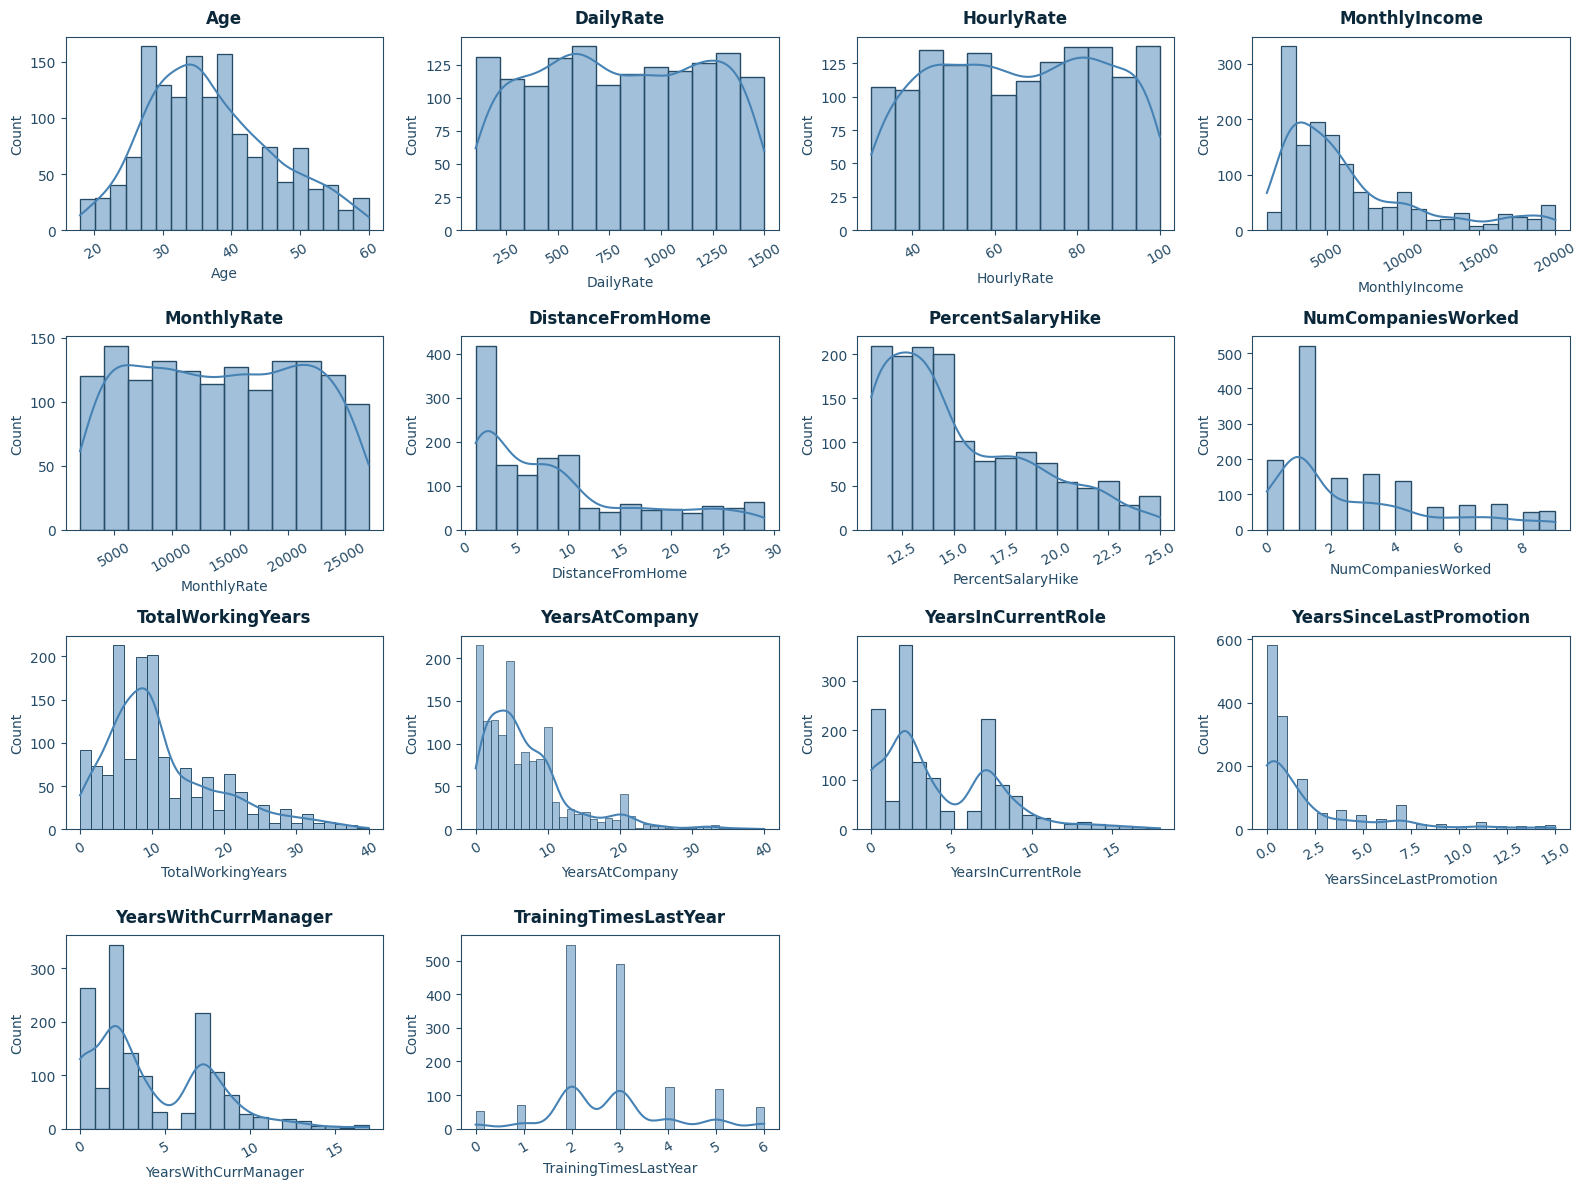

In [12]:

n_cols = 4
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Create histograms with KDE
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    sns.histplot(HR_EDA[col].dropna(), kde=True, bins='auto', ax=ax, color='steelblue', edgecolor='#254B66')
    ax.set_title(col, fontweight='bold', color="#0B273A", pad=10)
    ax.tick_params(axis='x', rotation=30)
    ax.spines['bottom'].set_color('#254B66')
    ax.spines['left'].set_color('#254B66')
    ax.spines['top'].set_color('#254B66')
    ax.spines['right'].set_color('#254B66')
    ax.tick_params(colors='#254B66', which='both') 
    ax.xaxis.label.set_color('#254B66') 
    ax.yaxis.label.set_color('#254B66')    

# Hide any unused axes
for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

From the histogram view, we can draw the following conclusions:

**Age** – The minimum and maximum values are acceptable for the labor market.

**Daily Rate, Hourly Rate, and Monthly Rate** – No negative values were found. The difference between the lowest and highest rates is notable.

**Monthly Income** – The values are reasonable, and the difference between the lowest and highest incomes is significant, which is consistent with the rate distributions.

**Distance From Home** – The values are acceptable, with no negative numbers.

**Number of Companies Worked** – The values appear reasonable but require further analysis. There are around 200 employees with 0 companies worked, but only approximately 100 with 0 **Total Working Years**.

**Years at the Company** – Most employees are relatively recent hires, but there is no indication of invalid values based on the available data.

**Years in Current Role** – The values are acceptable. The maximum value (18) does not suggest inconsistency, given that some employees have worked at the company for more than 40 years.

**Years Since Last Promotion** – No errors are evident.

**Years With Current Manager** – The values do not indicate any issues, and the same applies to the number of training times last year.


### **3.1.2. Analysing potential inconsistencies**

#### **3.1.2.1. Number of companies worked and Total Working Years**

Analysing the cases with a total of 0 in the Number of Companies Worked comparing it with the Total Working Years.

In [13]:
num_c = HR_EDA[HR_EDA['NumCompaniesWorked']==0]
num_c1 = num_c[['NumCompaniesWorked','YearsAtCompany','TotalWorkingYears']]
num_c1

,NumCompaniesWorked,YearsAtCompany,TotalWorkingYears
EmployeeNumber,,,
8,0,7,8
12,0,9,10
14,0,5,6
15,0,9,10
18,0,2,3
...,...,...,...
2024,0,9,10
2034,0,20,21
2056,0,20,21


There aren't cases where the years at company are greater than the total working years, so this data is considered consistent.

In [14]:
num_c2 = num_c1[num_c1['YearsAtCompany'] > num_c1['TotalWorkingYears']]
num_c2

,NumCompaniesWorked,YearsAtCompany,TotalWorkingYears
EmployeeNumber,,,


Is it possible to confirm that for most cases this is an error. If the total years working is more than 0, the numbe of companies worked should be also different from 0.
For this reason the next cell has a function of deal with this inconsistency. 

In [15]:
def fix_numcompanies_worked(row):
    """
    Fix NumCompaniesWorked when it's 0 but YearsAtCompany > 0
    """
    # Only fix if NumCompaniesWorked is 0 and YearsAtCompany > 0
    if row['NumCompaniesWorked'] == 0 and row['TotalWorkingYears'] > 0:
        # If total working years equals years at company, they've only worked at 1 company
        if row['TotalWorkingYears'] == row['YearsAtCompany']:
            return 1
        # If total working years > years at company, they've worked at least 2 companies
        elif row['TotalWorkingYears'] > row['YearsAtCompany']:
            return 2
        else:
            # Edge case: TotalWorkingYears < YearsAtCompany (data inconsistency)
            return row['NumCompaniesWorked']
    else:
        # Keep original value if conditions aren't met
        return row['NumCompaniesWorked']


In [16]:
# Apply the function to the current df
HR_EDA['NumCompaniesWorked'] = HR_EDA.apply(fix_numcompanies_worked, axis=1)

In [17]:
HR_EDA.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


#### **3.1.2.3. Years at the company and Years with the current manager**

Even with the last transformation,  any inconsistency was found when comparing the years at the company with the years with the current manager.

In [18]:
num_c3 = HR_EDA[HR_EDA['YearsAtCompany'] < HR_EDA['YearsWithCurrManager']]
num_c3

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


#### **3.1.2.4. Years at the company and Years in the current role**

There aren't cases with more years in the current role when compared with the years at the company.

In [19]:
num_c4 = HR_EDA[HR_EDA['YearsInCurrentRole'] > HR_EDA['YearsAtCompany']]
num_c4

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


#### **3.1.2.5. Years since the last promotion and years at the company**

In [20]:
num_c5 = HR_EDA[HR_EDA['YearsSinceLastPromotion'] > HR_EDA['YearsAtCompany']]
num_c5

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### **3.1.3. Analysing outliers**

The following bloxplots are usefull to check visually the outliers per feature.

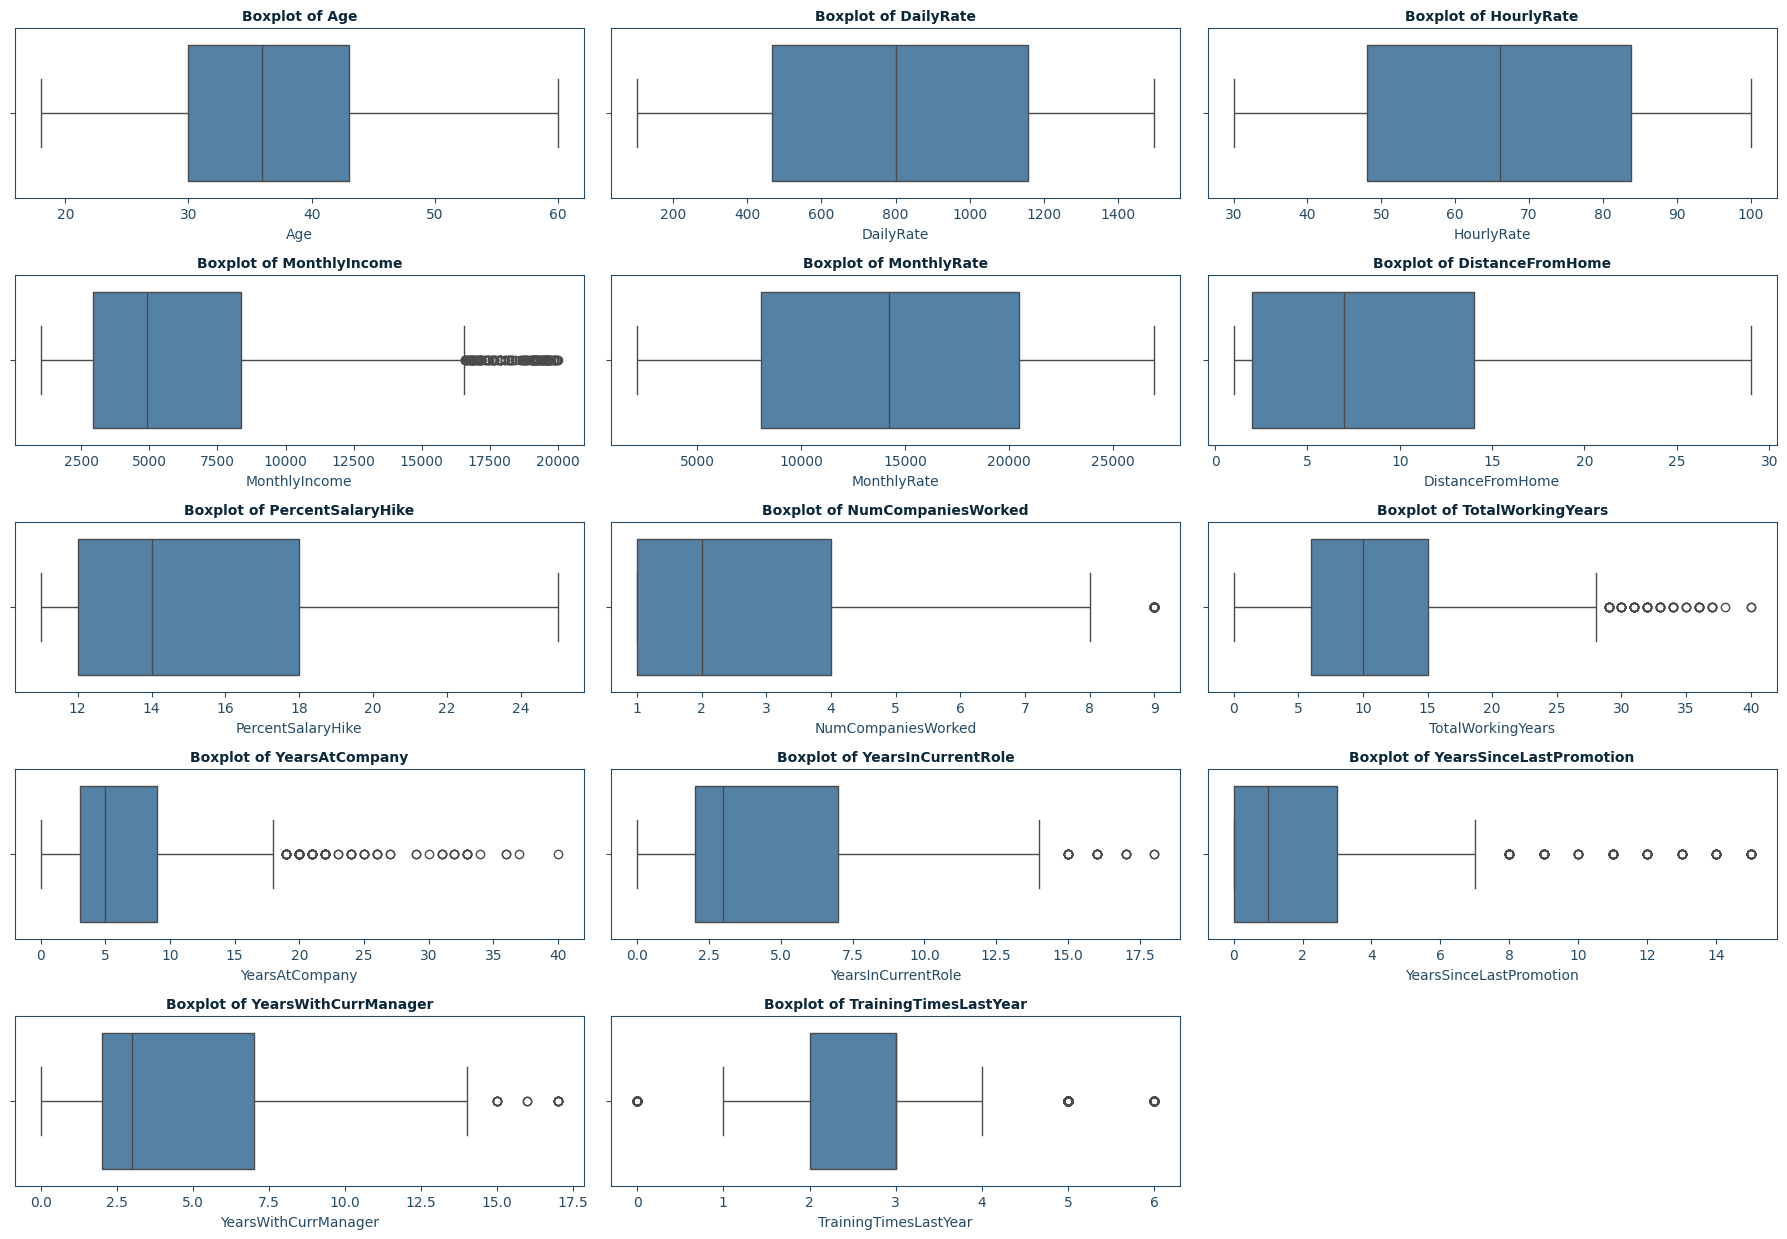

In [21]:
# Create subplots for each numerical feature, numeric_cols were set previouly
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 2.5*n_rows))  # wider & shorter
axes = axes.flatten()

# Create horizontal boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=HR_EDA, x=col, ax=axes[i], orient='h', color='steelblue') 
    axes[i].set_title(f'Boxplot of {col}', fontweight='bold', color="#0B273A", fontsize=10)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].spines['bottom'].set_color('#254B66')
    axes[i].spines['left'].set_color('#254B66')
    axes[i].spines['top'].set_color('#254B66')
    axes[i].spines['right'].set_color('#254B66')
    axes[i].tick_params(colors='#254B66', which='both') 
    axes[i].xaxis.label.set_color('#254B66')  
    axes[i].yaxis.label.set_color('#254B66')  

# Hide any unused subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

As expected there are a few outliers in some variables, mainly in what concerns to montly incomes, total number of working years and the same in current rule. There a few exceptions regarding the number of years at the company, a few observations that weren't promoted for more than 7 years. Although there are outliers, they can hide important details to be used later, therefore they will remain here.

The dataset has following numerical columns: ['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'DistanceFromHome', 'PercentSalaryHike', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear']

Interquartile ranges:
Age                           13.00
DailyRate                    692.00
HourlyRate                    35.75
MonthlyIncome               5468.00
MonthlyRate                12414.50
DistanceFromHome              12.00
PercentSalaryHike              6.00
NumCompaniesWorked             3.00
TotalWorkingYears              9.00
YearsAtCompany                 6.00
YearsInCurrentRole             5.00
YearsSinceLastPromotion        3.00
YearsWithCurrManager           5.00
TrainingTimesLastYear          1.00
dtype: float64

75% quartiles:
Age                           43.00
DailyRate                   1157.00
HourlyRate                    83.75
MonthlyIncome         

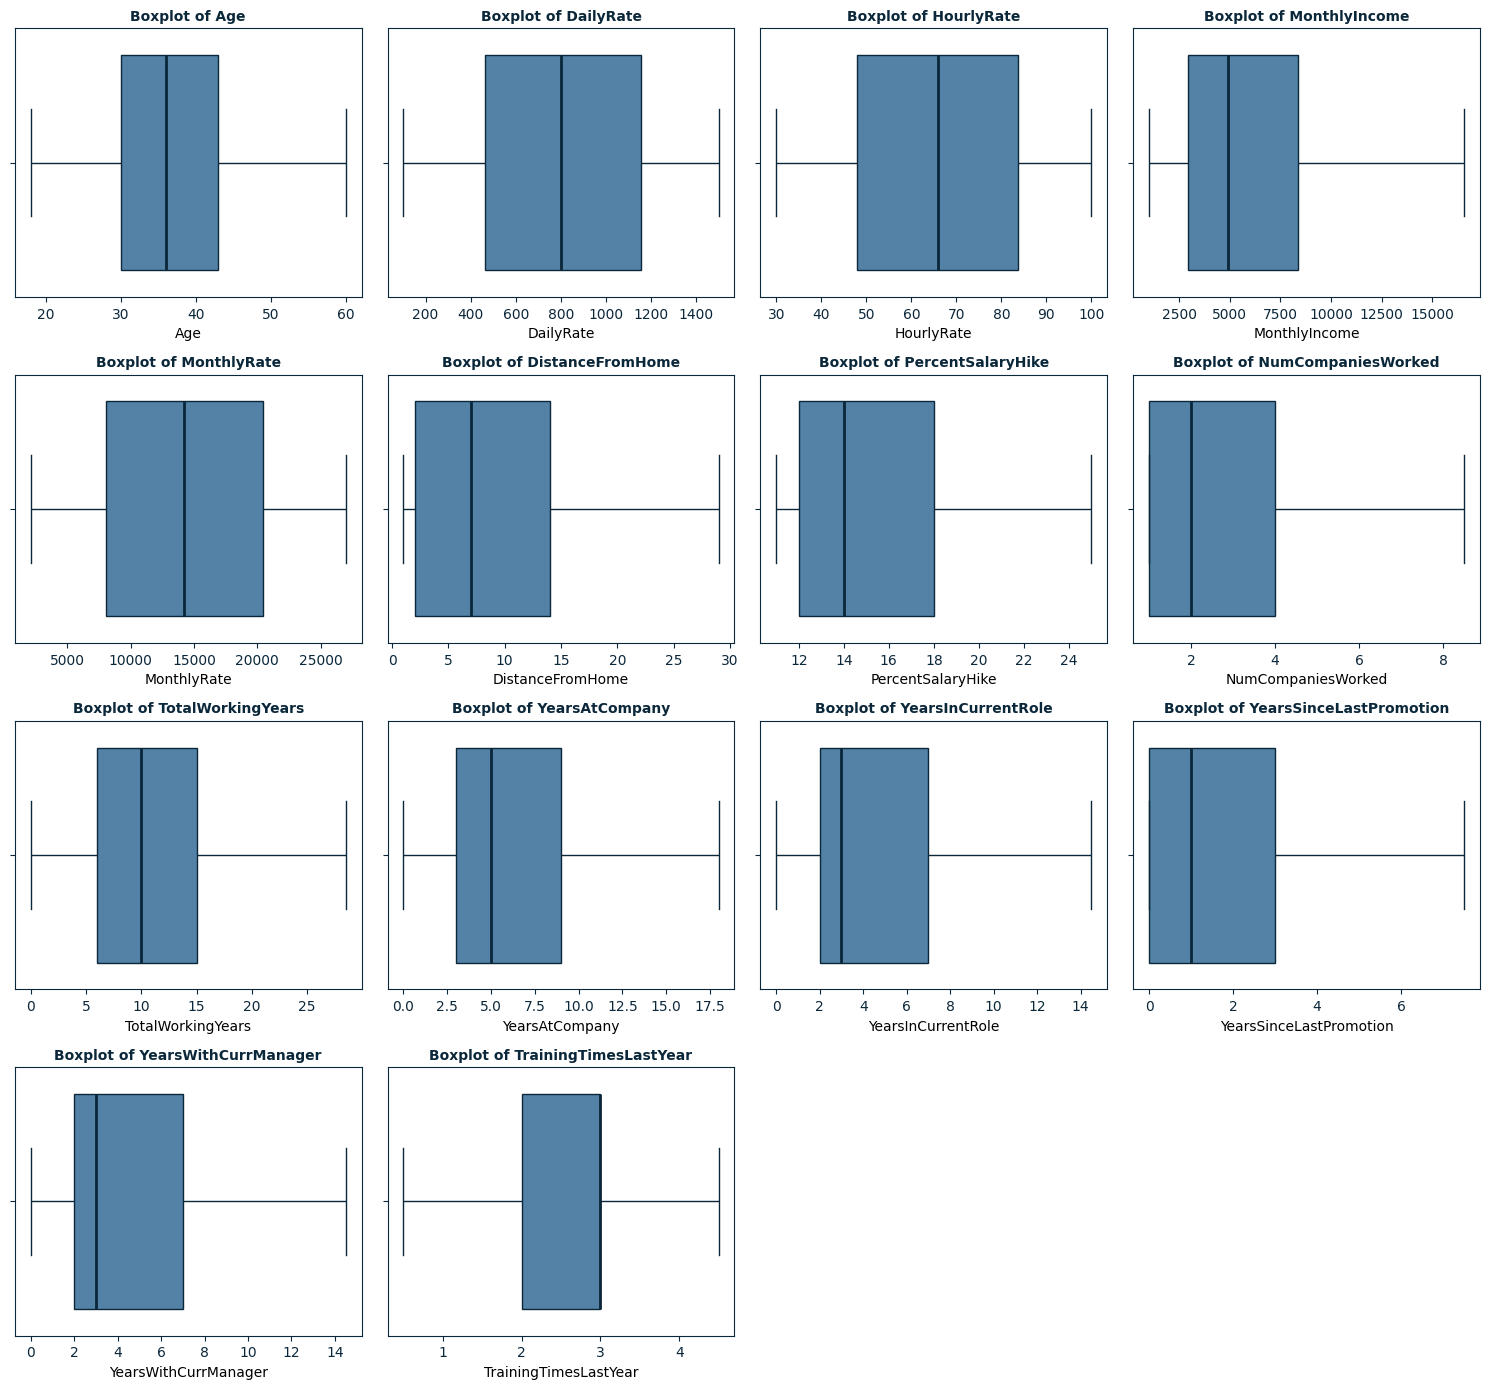

In [22]:
HR_EDA_outliers = HR_EDA.copy()
numeric_cols = ['Age','DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 
                'DistanceFromHome','PercentSalaryHike', 'NumCompaniesWorked', 
                'TotalWorkingYears', 'YearsAtCompany','YearsInCurrentRole', 
                'YearsSinceLastPromotion','YearsWithCurrManager', 'TrainingTimesLastYear']

# Calculate Q1, Q3, and IQR
q1 = HR_EDA_outliers[numeric_cols].quantile(0.25)
q3 = HR_EDA_outliers[numeric_cols].quantile(0.75)
iqr = q3 - q1

print("The dataset has following numerical columns:", numeric_cols)
print("\nInterquartile ranges:")
print(iqr)
print("\n75% quartiles:")
print(q3)
print("\n25% quartiles:")
print(q1)

# Define lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers with bounds 
HR_EDA_clipped = HR_EDA_outliers.copy()
for col in numeric_cols:
    HR_EDA_clipped[col] = HR_EDA_outliers[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# Descriptive statistics
print("\nDescriptive statistics after clipping:")
print(HR_EDA_clipped[numeric_cols].describe())

# Plotting 
n_cols_plot = 4
n_rows_plot = (len(numeric_cols) + n_cols_plot - 1) // n_cols_plot

fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(15, 3.5*n_rows_plot))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(
        data=HR_EDA_clipped, 
        x=col, 
        ax=axes[i], 
        orient='h',
        color='steelblue',  
        boxprops=dict(edgecolor='#0B273A'),
        whiskerprops=dict(color='#0B273A'),
        capprops=dict(color='#0B273A'),
        medianprops=dict(color='#0B273A', linewidth=2)
    )
    axes[i].set_title(f'Boxplot of {col}', fontsize=10, color='#0B273A', fontweight='bold')
    axes[i].tick_params(colors='#0B273A')
    
    # Color spines
    for spine in axes[i].spines.values():
        spine.set_color('#0B273A')

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

JobLevel, MonthlyIncome, NumCompaniesWorked, PerformanceRating, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion are all right-skewed variables.

`MonthlyIncome` , `TotalWorkingYears` , `YearsAtCompany` and `YearsSinceLastPromotion` are especially right-skewed, so we should use a **log transformation** for these variables.

In [23]:
HR_EDA_clipped['MonthlyIncomeLog'] = np.log(HR_EDA_clipped['MonthlyIncome']+1#, where=HR_1['MonthlyIncome']>0
                                  )
HR_EDA_clipped['TotalWorkingYearsLog'] = np.log(HR_EDA_clipped['TotalWorkingYears']+1#, where=HR_1['TotalWorkingYears']>0
                                      )
HR_EDA_clipped['YearsAtCompanyLog'] = np.log(HR_EDA_clipped['YearsAtCompany']+1#, where=HR_1['YearsAtCompany']>0
                                   )
HR_EDA_clipped['YearsSinceLastPromotionLog'] = np.log(HR_EDA_clipped['YearsSinceLastPromotion']+1#, where=HR_1['YearsSinceLastPromotion']>0
                                            )

HR_EDA_clipped.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeLog,TotalWorkingYearsLog,YearsAtCompanyLog,YearsSinceLastPromotionLog
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8.0,Yes,11,3,1,0,8.0,0.5,1,6,4.0,0.0,5.0,8.698514,2.197225,1.945910,0.000000
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1.0,No,23,4,4,1,10.0,3.0,3,10,7.0,1.0,7.0,8.543056,2.397895,2.397895,0.693147
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6.0,Yes,15,3,2,0,7.0,3.0,3,0,0.0,0.0,0.0,7.645398,2.079442,0.000000,0.000000
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1.0,Yes,11,3,3,0,8.0,3.0,3,8,7.0,3.0,0.0,7.975908,2.197225,2.197225,1.386294
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,8.5,No,12,3,4,1,6.0,3.0,3,2,2.0,2.0,2.0,8.151622,1.945910,1.098612,1.098612


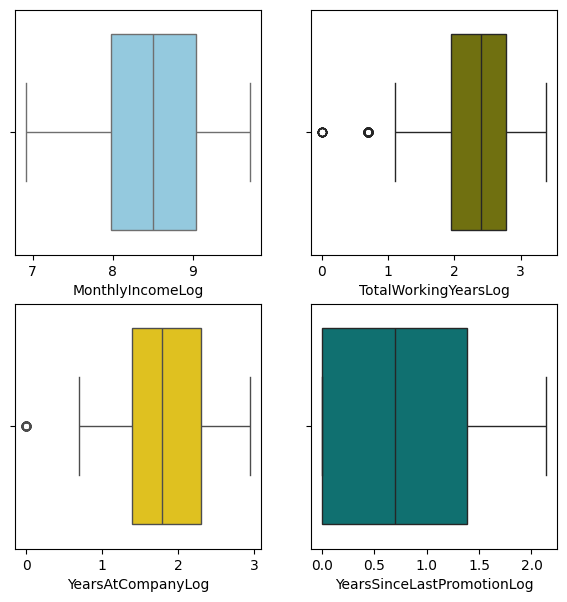

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.boxplot(data=HR_EDA_clipped, x="MonthlyIncomeLog", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=HR_EDA_clipped, x="TotalWorkingYearsLog", color="olive", ax=axs[0, 1])
sns.boxplot(data=HR_EDA_clipped, x="YearsAtCompanyLog", color="gold", ax=axs[1, 0])
sns.boxplot(data=HR_EDA_clipped, x="YearsSinceLastPromotionLog", color="teal", ax=axs[1, 1])

plt.show()

### **3.1.4. Spearman correlations**

The following heatmap represents illustrates the correlations between numeric variables.

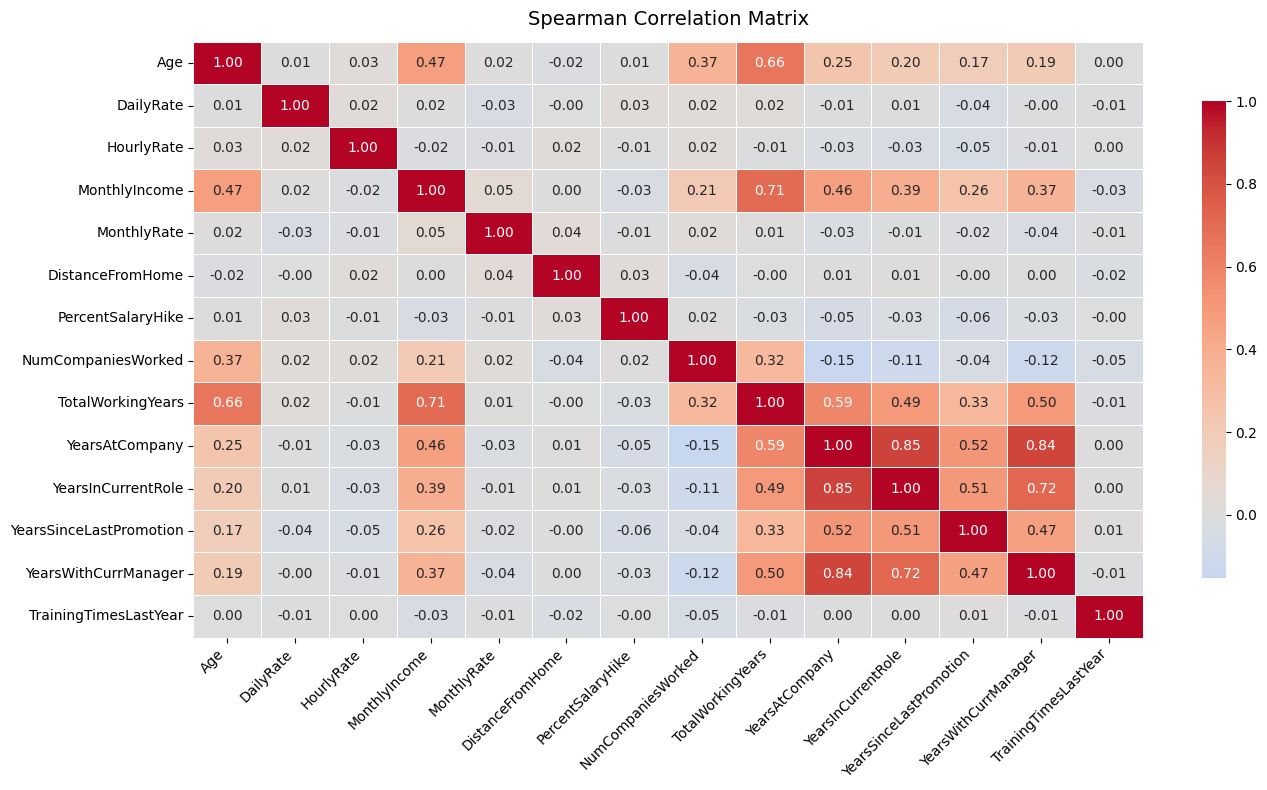

In [25]:
HR_scaled = HR_EDA.copy()
scaler = MinMaxScaler()

HR_scaled[numeric_cols] = scaler.fit_transform(HR_scaled[numeric_cols])

corr_matrix = HR_scaled[numeric_cols].corr(method='spearman')

# Heatmap with annotations
plt.figure(figsize=(14, 8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',        # color palette
    center=0,               # zero-centered colors
    annot=True,             # adds correlation numbers
    fmt=".2f",              # two decimal places
    linewidths=0.5,         # lines between cells
    cbar_kws={"shrink": 0.8}  # smaller color bar
)

plt.title("Spearman Correlation Matrix", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Correlation Strength:

0.00 - 0.19: Very weak (negligible)
0.20 - 0.39: Weak
0.40 - 0.59: Moderate
0.60 - 0.79: Strong
0.80 - 1.00: Very strong


Following the guideline above, it is possible to find different strong correlations that are worth to hightlight:
1. Total working years and Montly income (0.71) indicates that a longer careear represents an higher income
2. Years at the company and years in the current rule (0.85) - it means that as the years in the company increase the years in the current role tend to increase. It may indicate that employees stay in the same role, however it may also indicate that there are limited promotions or options to progess. On other hand, this may indicate a stable workforce.
This variables should be a subject of deeper analysis in the further chapters.
3. Years at the company and years with the current manager (0.84) - suggests that as the years passes people stays with the same manager. 
4. Similar happens with years with the current manager and years with the number of years in the same role (0.72).

**Final remarks:**

The employee **age** distribution is consistent with global employment standards, with no employees under 18 and a maximum age of 60. As indicated by the visualization, the distribution exhibits a slightly positive/right skew, suggesting that most employees are concentrated between their late twenties and late thirties. Furthermore, employees with a long tenure (e.g., 40 years of service) are clearly the exception, not the rule.

The distributions for **Daily, Hourly, and Monthly Rates** are generally spread out and close to uniform. This implies that compensation values are not heavily concentrated at any specific point (low, middle, or high end). Instead, rates are fairly evenly represented across the entire range between the minimum and maximum value for each respective variable.

The remaining employee features also present values that are consistent with the professional world:
There is a significant difference between the lowest and highest **monthly incomes**.
Smaller salary increases are more common than substantial hikes.

## **3.2. Ordinal categorical features**

The dataset has variables that are represented by numbers but are actually categories. 


- Education: 
    - 1 = Below College
    - 2 = College
    - 3 = Bachelor
    - 4 = Master
    - 5 = Doctor
- EnvironmentSatisfaction
    - 1 = Low
    - 2 = Medium
    - 3 = High
    - 4 = Very High
- JobInvolvement
    - 1 = Low
    - 2 = Medium
    - 3 = High
    - 4 = Very High
- JobLevel
    - 1 = HC Rep
    - 2 = HR
    - 3 = Lab Technician
    - 4 = Manager
    - 5 = Managing Director
    - 6 = Research Director
- JobSatisfaction
    - 1 = Low
    - 2 = Medium
    - 3 = High
    - 4 = Very High
- PerformanceRating
    - 1 = Low
    - 2 = Good
    - 3 = Excellent
    - 4 = Outstanding
- RelationshipSatisfaction
    - 1 = Low
    - 2 = Medium
    - 3 = High
    - 4 = Very High
- StockOptionLevel - 0 to 4
- WorkLifeBalance
    - 1 = Bad
    - 2 = Good
    - 3 = Better 
    - 4 = Best

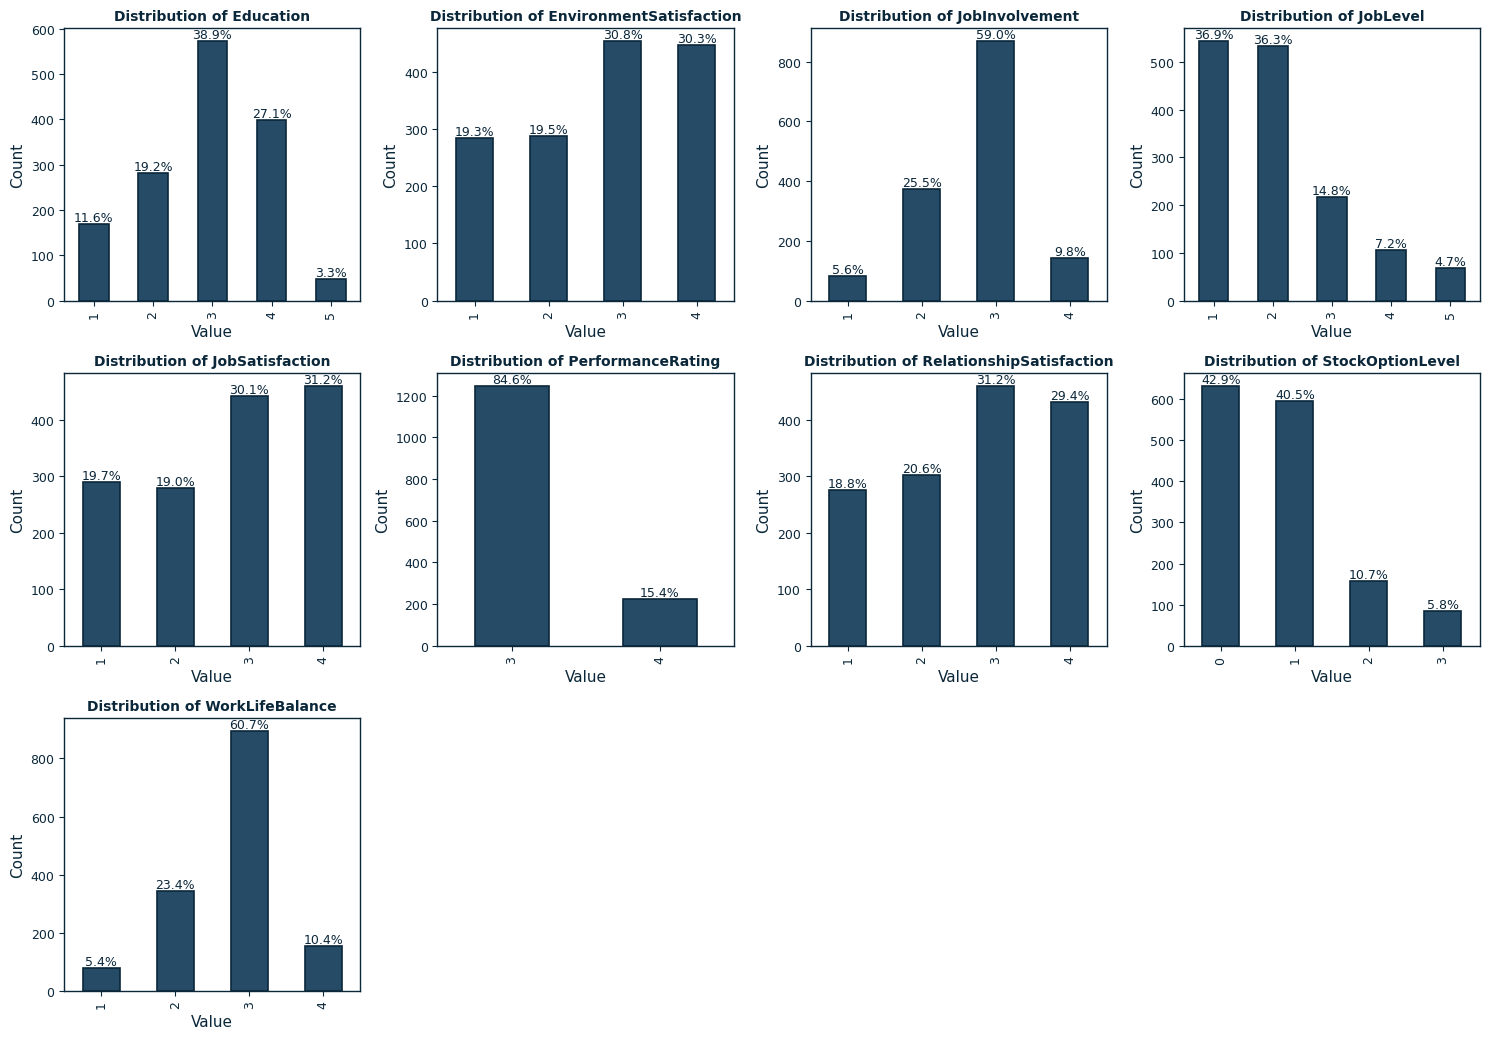

In [26]:
ordinal_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
                'JobLevel', 'JobSatisfaction', 'PerformanceRating',
                'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

# Create a figure and subplots
n_cols = 4
n_rows = (len(ordinal_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 3.5*n_rows))

for i, col in enumerate(ordinal_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Calculate value counts and percentages
    counts = HR_EDA[col].value_counts().sort_index()
    percentages = HR_EDA[col].value_counts(normalize=True).sort_index() * 100
    
    # Create bar plot
    ax = counts.plot(kind='bar', color='#254B66', edgecolor='#0B273A', linewidth=1.2)
    plt.title(f'Distribution of {col}', color='#0B273A', fontsize=10, fontweight='bold')  # Title color
    plt.xlabel('Value', color='#0B273A', fontsize=11)  # X-axis label color
    plt.ylabel('Count', color='#0B273A', fontsize=11)  # Y-axis label color

    # Add percentage labels on top of each bar
    for j, v in enumerate(counts):
        plt.text(j, v, f'{percentages[counts.index[j]]:.1f}%', 
            ha='center', va='bottom', color='#0B273A', fontsize=9)
        
    # Color the tick labels (numbers on axes)
    ax.tick_params(axis='x', colors='#0B273A', labelsize=9)
    ax.tick_params(axis='y', colors='#0B273A', labelsize=9)

    # Color the spines (edges of graph)
    for spine in ax.spines.values():
        spine.set_color('#0B273A')
        spine.set_linewidth(1)    

plt.tight_layout()
plt.show()


**Highlights:**

- Education - Almost 70% of the employees have a Bachelo, Master or Doctor degree. However, bachelor degree is the category with more representation - 38.9%.  
- Environment Satisfaction - about 61% of the employees have high or very high satisfaction about the enviroment. However, the level 1 (low) and 2 (medium) should be a reason of concern.
- Job Involvement - 60% of the employees are highly involved with the job which is a good indicator.
- Job Level - The management  classes are less representative which is consistent with the work labor.
- Job Satisfaction - About 60% of the employees are satisfied with the job, but the remaining ones should be a reason of analysis.
- PerformanceRating - All employees are excellent or outstanding in their jobs.
- RelationshipSatisfaction - Almost 40% of the employees are low or medium satisfied which is a reason for concern. 
- StockOptionLevel - most employees don't have the option usually for higher level careers which is consistent with the job levels seen before.
- WorkLifeBalance - 5.4% indicated a bad work life balance which is a reason of concern.


## **3.3. Nominal categorical features**

In [27]:
HR_EDA.select_dtypes(include='object').nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [28]:
HR_EDA.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


In [29]:
HR_cat = HR_EDA.select_dtypes(include=['object'])
for col in HR_cat.columns:
  print(HR_cat[col].value_counts(dropna=False, normalize=True), end='\n\n')

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64

Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64

EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

JobRole
Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.

**Highlights:**

- Attrition, Gender, and OverTime are binary classes, while the remaining categorical variables are multiclass.

- Some classes are underrepresented such as Human Resources in Job Roles, and Human Resources in Department and Education Field (under 5% representation). 

- Most categorical variables have non-balanced distributions (one class is more represented than the others).

- This analysis indicates that using a Stratified k fold will be necessary to manage imbalances. To avoid leakage the encoding, scaling and feature selection will be performed inside each fold, using the SMOTE for the target variable only to the training split.



# **4. Bivariate data analysis**

Now we shall inspect how the Attrition behaves according to the remaining variables.

## **4.1. Numerical features**

### **4.1.1. Box plot visualization**

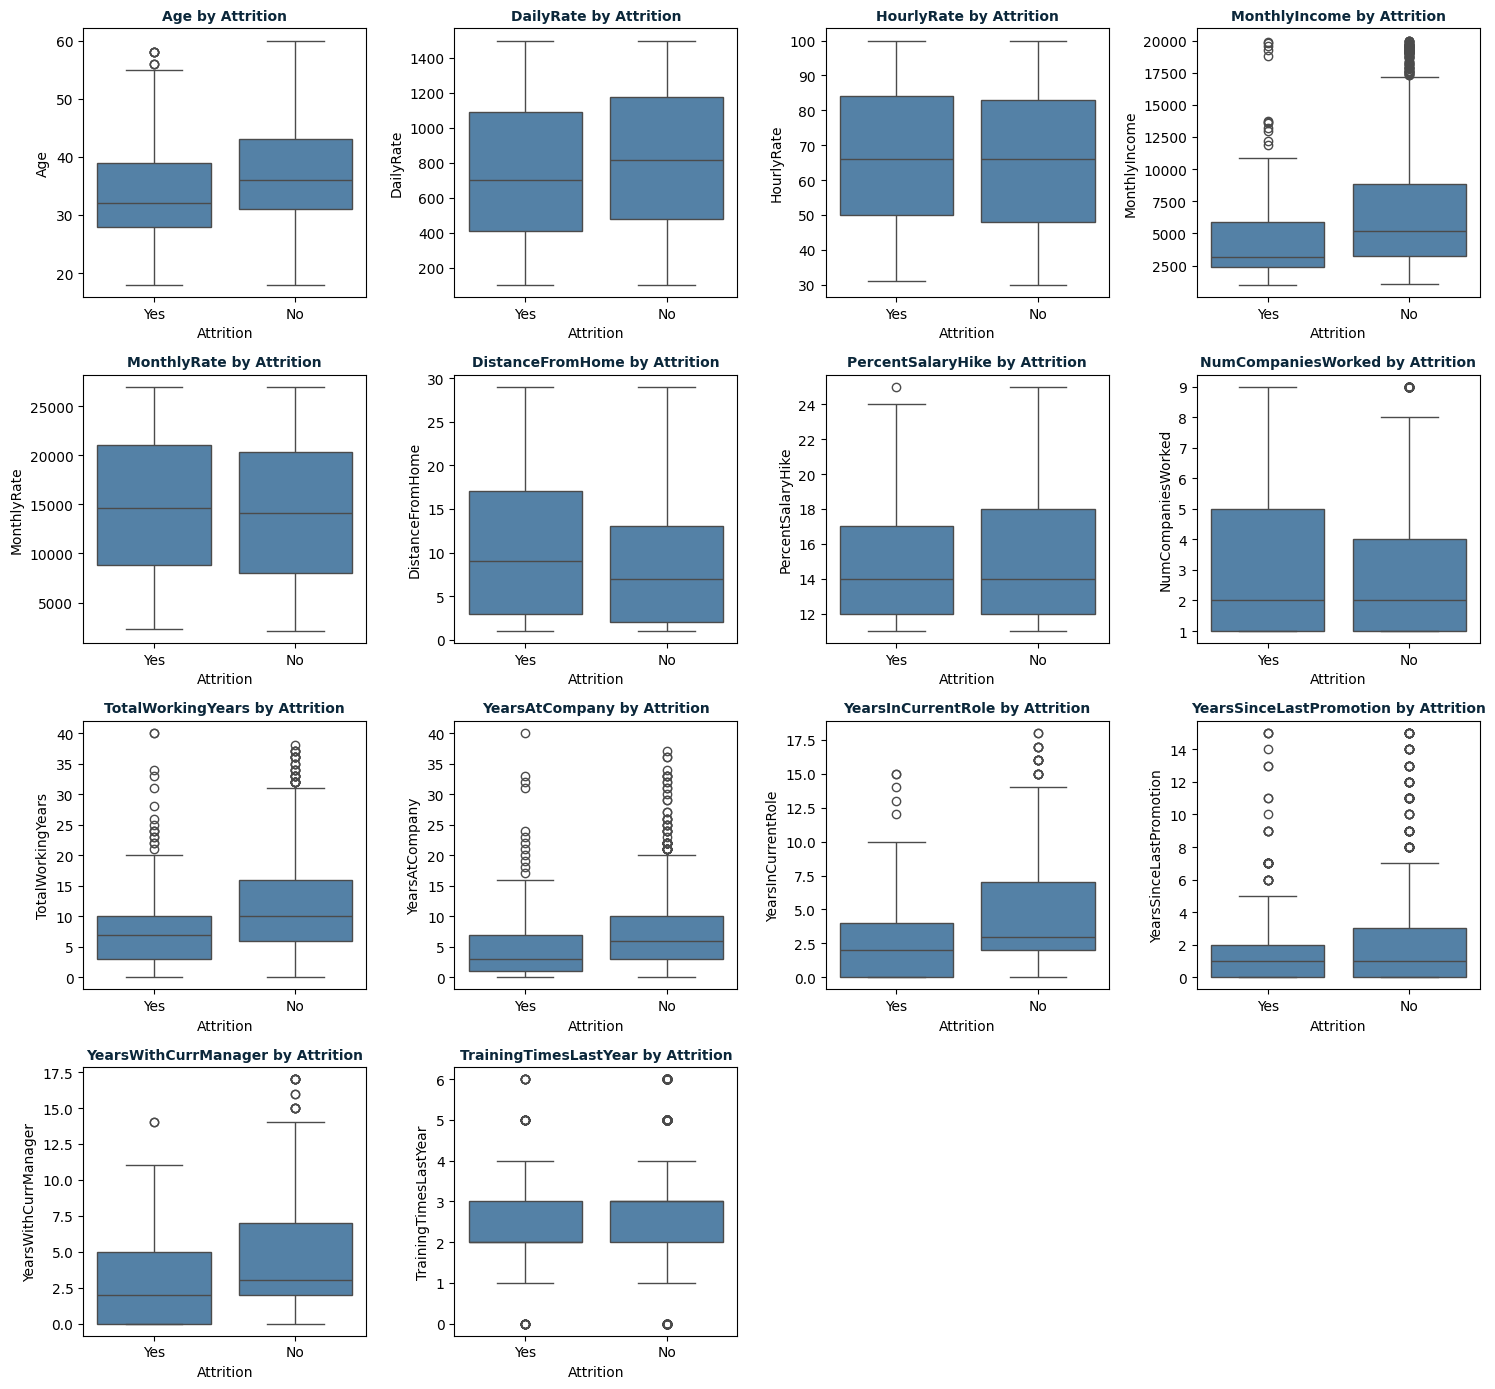

In [30]:
#numeric_cols was defined previously
# Create a figure and subplots
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3.5*n_rows))
axes = axes.flatten()  # Flatten to make indexing easier

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=HR_EDA, x="Attrition", y=col, color='steelblue', ax=axes[i])
    axes[i].set_title(f"{col} by Attrition", color="#0B273A", fontsize=10, fontweight='bold')
        # Color the tick labels (numbers on axes)
    ax.tick_params(axis='x', colors='#0B273A', labelsize=9)
    ax.tick_params(axis='y', colors='#0B273A', labelsize=9)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

 

**Highlights:**

- **Age** there are 2 evident exception cases of older people leaving the company. This could be motivated by external factors like retirement.
- **Monthly income** there are a few cases with higher incomes (outliers) leaving the company, which should be investigated.
- Cases with more than 5 years without a **promotion** should be investigated.

### **4.1.2. Histogram visualization**

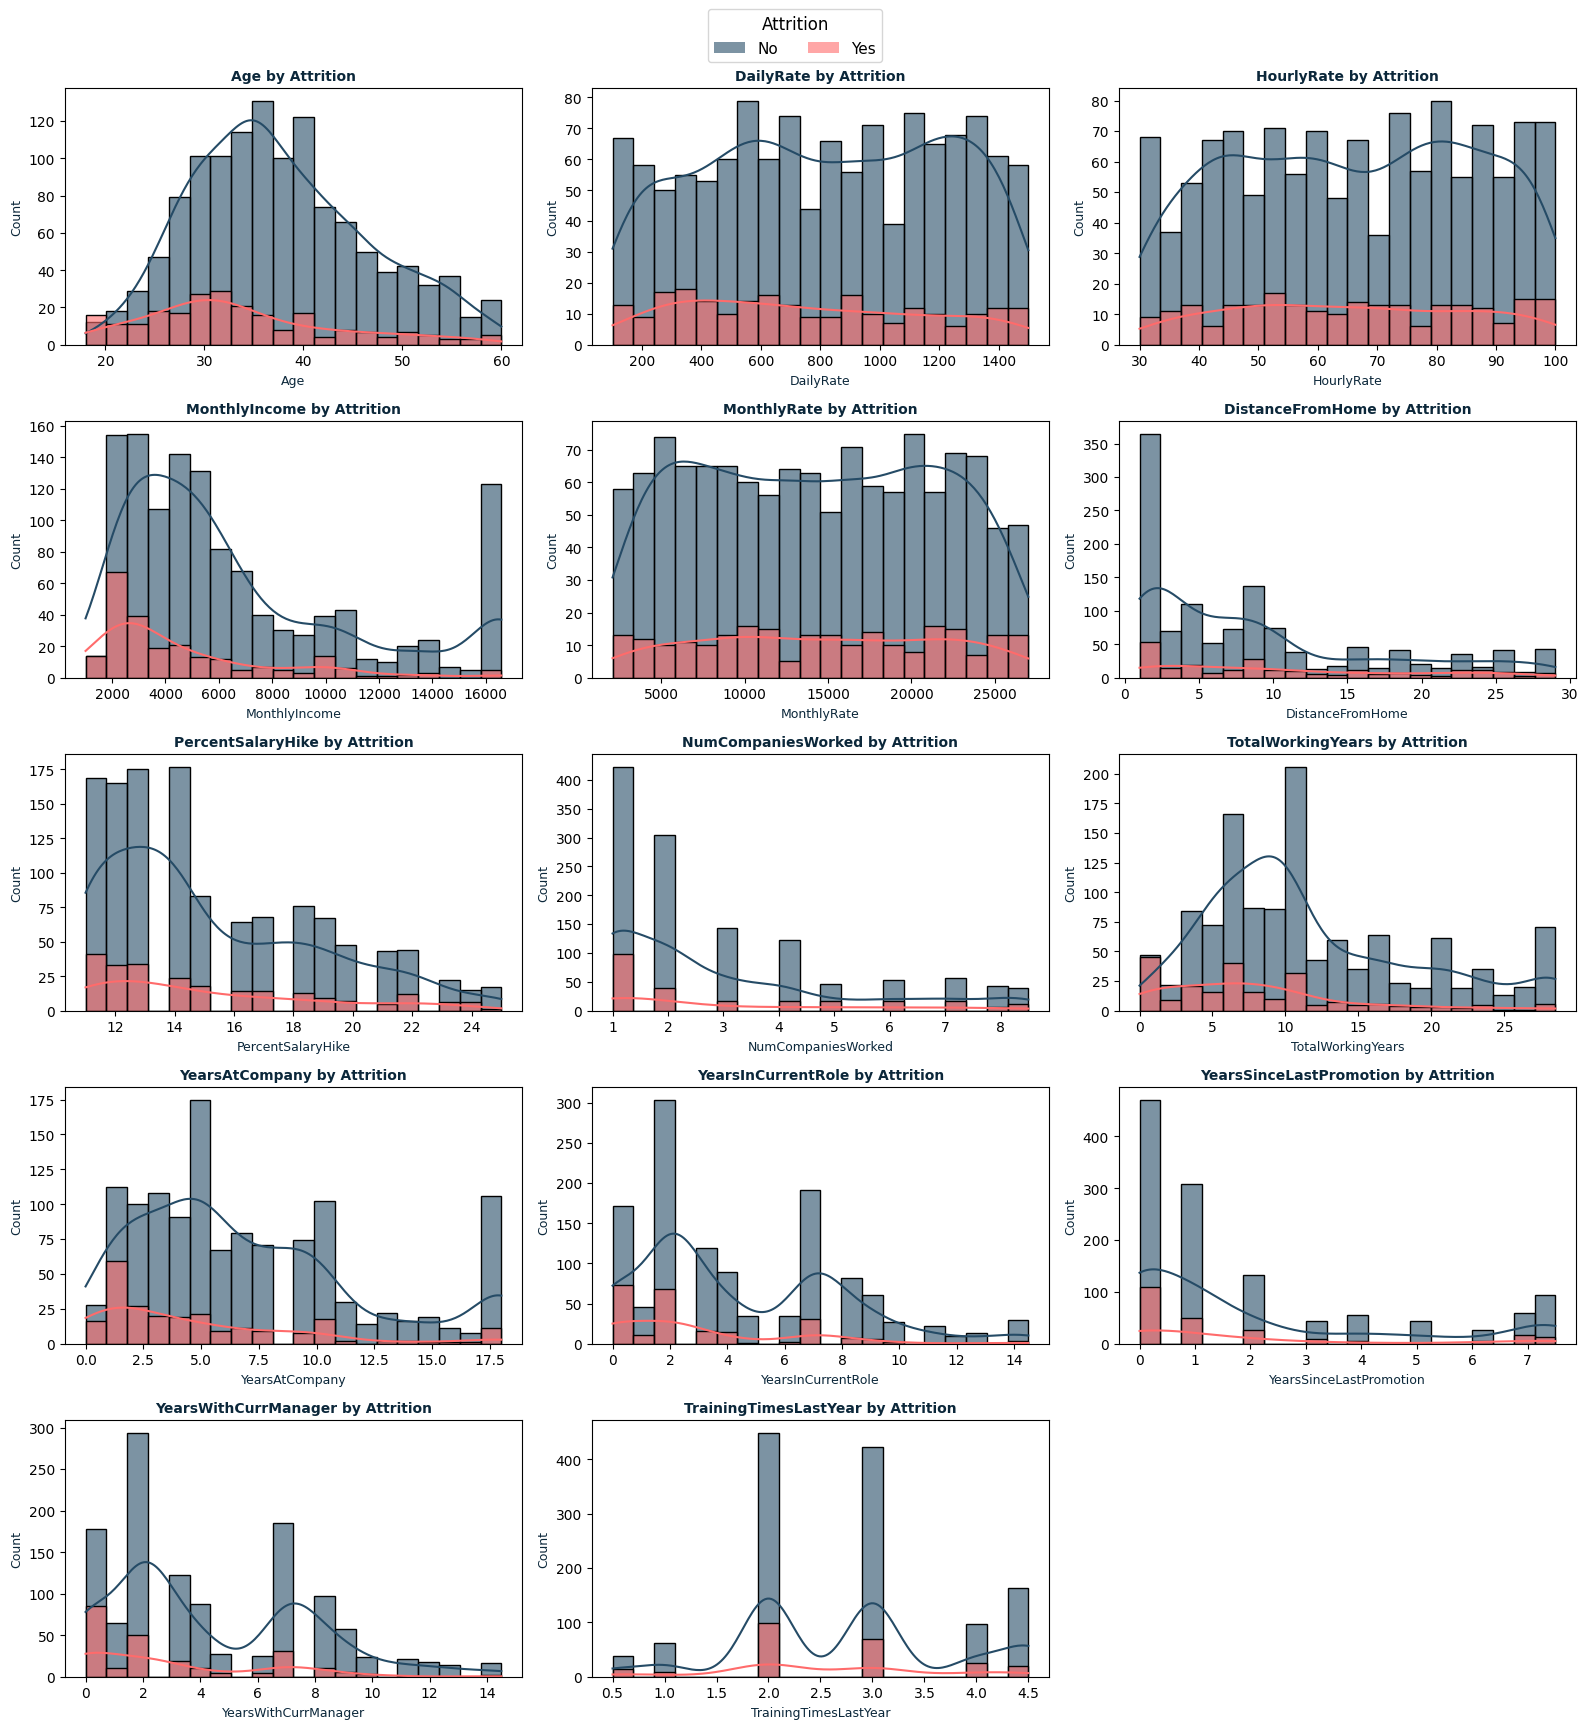

In [31]:
numeric_cols = ['Age','DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 
                'DistanceFromHome','PercentSalaryHike', 'NumCompaniesWorked', 
                'TotalWorkingYears', 'YearsAtCompany','YearsInCurrentRole', 
                'YearsSinceLastPromotion','YearsWithCurrManager', 'TrainingTimesLastYear']

if 'Attrition' in numeric_cols:
    numeric_cols.remove('Attrition')

n_cols_plot = 3
n_rows_plot = (len(numeric_cols) + n_cols_plot - 1) // n_cols_plot

fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(16, 3.5*n_rows_plot))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(
        data=HR_EDA_clipped, 
        x=col, 
        hue='Attrition',
        bins=20,
        alpha=0.6,
        kde=True,
        ax=axes[i],
        palette={'No': '#254B66', 'Yes': '#FF6B6B'},
        legend=False
    )
    axes[i].set_title(f"{col} by Attrition", color='#0B273A', fontweight='bold', fontsize=10)
    axes[i].set_xlabel(col, color='#0B273A', fontsize=9)
    axes[i].set_ylabel("Count", color='#0B273A', fontsize=9)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# Create legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#254B66', alpha=0.6, label='No'),
    Patch(facecolor='#FF6B6B', alpha=0.6, label='Yes')
]

# Apply tight_layout FIRST with space reserved at top
plt.tight_layout(rect=[0, 0, 1, 0.96])

# THEN add legend
fig.legend(handles=legend_elements, 
           title='Attrition',
           loc='upper center', 
           ncol=2, 
           fontsize=11, 
           title_fontsize=12,
           frameon=True, 
           bbox_to_anchor=(0.5, 0.99))

plt.show()


**Highlights:**

- **Age** - younger people tend to leave more often

The next graph is for presentation purposes:

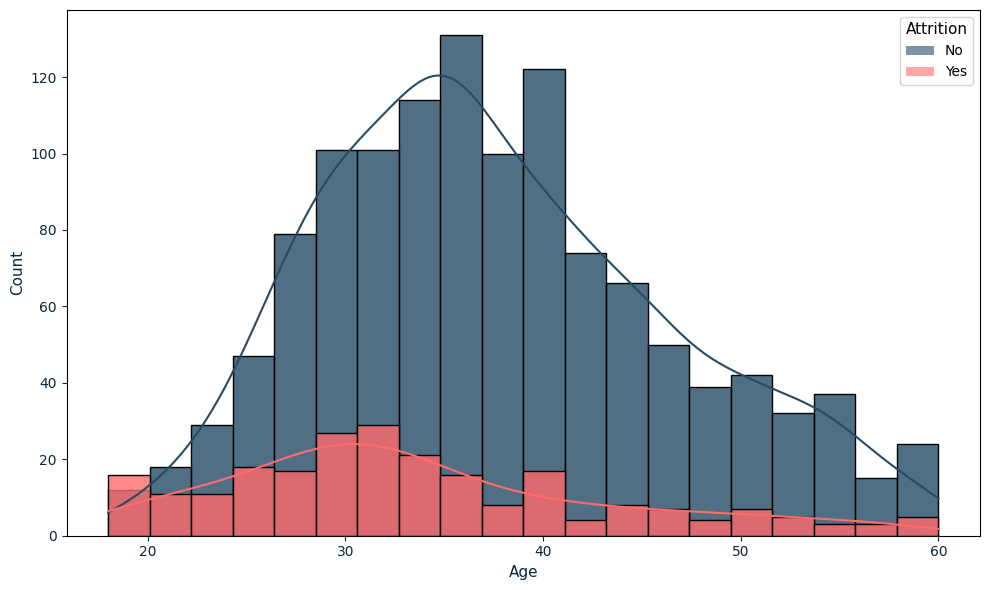

In [32]:
# Create single plot for Age
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
    data=HR_EDA, 
    x='Age', 
    hue='Attrition',
    bins=20,
    alpha=0.8,
    kde=True,
    ax=ax,
    palette={'No': '#254B66', 'Yes': '#FF6B6B'},
    legend=False
)

#ax.set_title("Age by Attrition")
ax.set_xlabel("Age", color='#0B273A', fontsize=11)
ax.set_ylabel("Count", color='#0B273A', fontsize=11)

# Set tick label colors to match axis labels
ax.tick_params(axis='x', colors='#0B273A')
ax.tick_params(axis='y', colors='#0B273A')

# Create legend
legend_elements = [
    Patch(facecolor='#254B66', alpha=0.6, label='No'),
    Patch(facecolor='#FF6B6B', alpha=0.6, label='Yes')
]

ax.legend(handles=legend_elements, 
          title='Attrition',
          loc='upper right', 
          fontsize=10, 
          title_fontsize=11,
          frameon=True)

# Remove grid
ax.grid(False)
plt.tight_layout()
plt.show()

## **4.2. Ordinal categorical features**

The Attrition target variable is unbalanced, therefore it is better to use percentages rather than absolute values to check for relationships with the other variables.

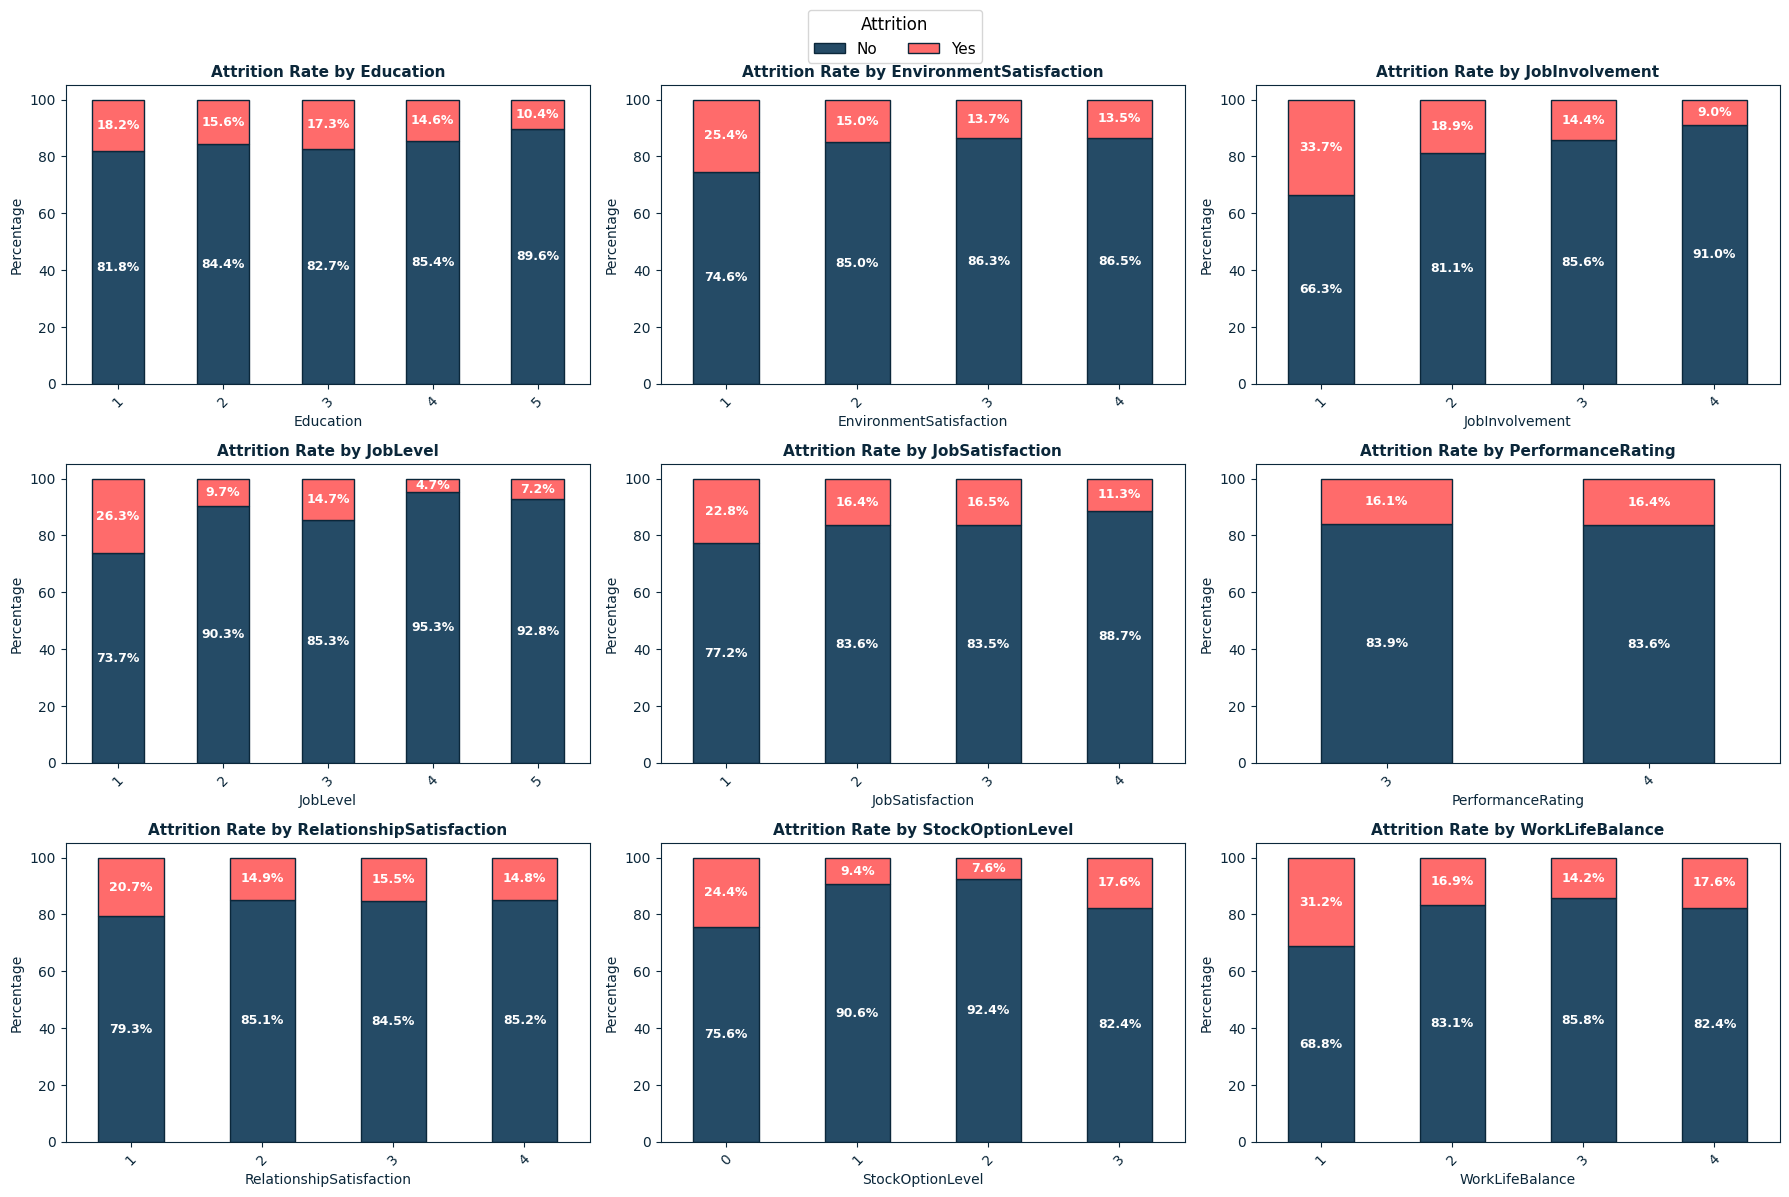

In [33]:
n_cols = 3
n_rows = int(np.ceil(len(ordinal_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

def autolabel_stacked(ax):
    """ add % in bars """
    for rect in ax.patches:
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        if height > 0:
            ax.text(
                x + width / 2.,
                y + height / 2.,
                f'{height:.1f}%', 
                ha='center', 
                va='center', 
                fontsize=9,
                color='white', 
                fontweight='bold'
            )

# variables for legend capture
handles = []
labels = []

for idx, col in enumerate(ordinal_cols):
    crosstab = pd.crosstab(HR_EDA[col], HR_EDA['Attrition'], normalize='index') * 100
    ax = axes[idx]
    
    
    plot_object = crosstab.plot(
        kind='bar', 
        stacked=True, 
        color=['#254B66', '#FF6B6B'], 
        ax=ax,
        edgecolor='#0B273A',
        linewidth=1
    )
    
    # Add % in the bars
    autolabel_stacked(ax)
    
    if idx == 0:
        handles, labels = ax.get_legend_handles_labels()
        ax.get_legend().remove()
    else:
        ax.get_legend().remove()

    ax.set_title(f'Attrition Rate by {col}', color='#0B273A', fontweight='bold', fontsize=11)
    ax.set_xlabel(col, color='#0B273A', fontsize=10)
    ax.set_ylabel('Percentage', color='#0B273A', fontsize=10)
    ax.tick_params(axis='x', rotation=45, colors='#0B273A')
    ax.tick_params(axis='y', colors='#0B273A')
    
    # Color spines
    for spine in ax.spines.values():
        spine.set_color('#0B273A')

# Hide unused subplots
for j in range(idx+1, len(axes)):
    axes[j].set_visible(False)


from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#254B66', label='No', edgecolor='#0B273A'),
    Patch(facecolor='#FF6B6B', label='Yes', edgecolor='#0B273A')
]

fig.legend(
    legend_elements,
    ['No', 'Yes'],
    title='Attrition',
    title_fontsize=12,
    loc='upper center',           
    bbox_to_anchor=(0.5, 1.0),    
    ncol=2,
    fontsize=11
)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

**Highlights**

## **4.3. Nominal Categorical features**

The Attrition target variable is unbalanced, therefore it is better to use percentages rather than absolute values to check for relationships with the other variables.
The following representation allows to understand for each category (considering its total) which variant have impact in the decision of leaving the company. 


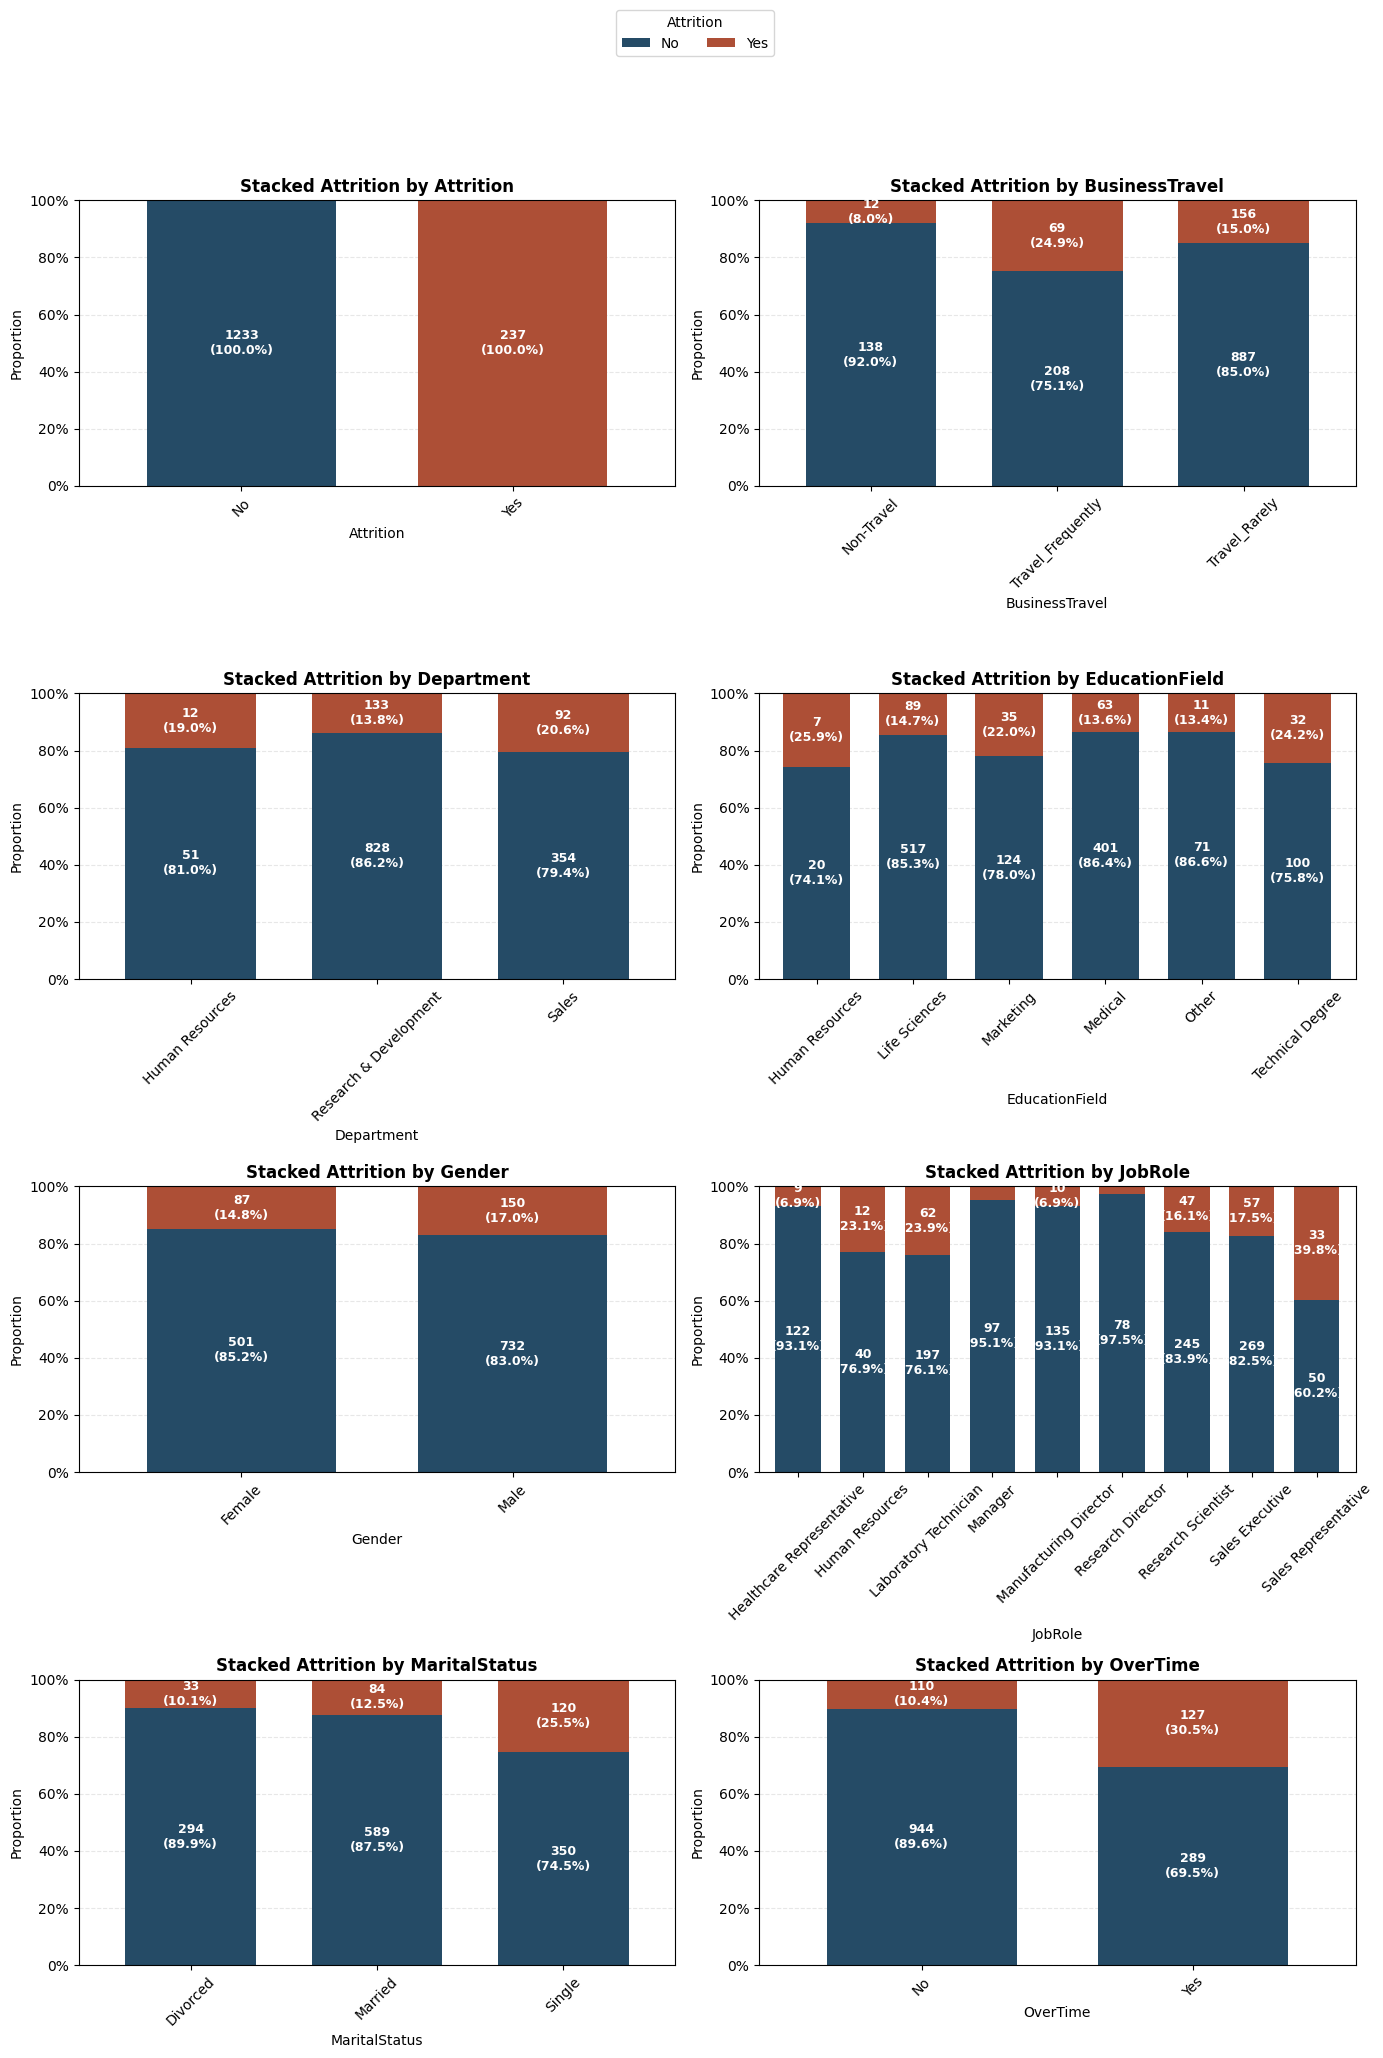

In [34]:
categorical_cols = HR_EDA_clipped.select_dtypes(include='object').columns.tolist()

n_cols = 2
n_rows = int(np.ceil(len(categorical_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 5))
axes = axes.flatten()


def autolabel_stacked(ax, col):
    """Place COUNT and % on two lines inside each bar."""
    
    crosstab_pct = pd.crosstab(HR_EDA_clipped[col], HR_EDA_clipped['Attrition'], normalize='index')
    crosstab_abs = pd.crosstab(HR_EDA_clipped[col], HR_EDA_clipped['Attrition'])

    for container in ax.containers:
        for i, bar in enumerate(container):
            height = bar.get_height()
            if height > 0.05:  # Only label segments large enough
                
                category = ax.get_xticklabels()[i].get_text()
                attr = container.get_label()  # "Yes" or "No"

                count = crosstab_abs.loc[category, attr]
                pct = height * 100

                ax.text(
                    bar.get_x() + bar.get_width()/2,
                    bar.get_y() + height/2,
                    f"{count}\n({pct:.1f}%)",  
                    ha='center', va='center',
                    fontsize=9, fontweight='bold',
                    color='white'
                )


handles, labels = [], []

for idx, col in enumerate(categorical_cols):
    
    prop = pd.crosstab(HR_EDA_clipped[col], HR_EDA_clipped['Attrition'], normalize="index")
    ax = axes[idx]

    prop.plot(kind='bar', stacked=True, width=0.7,
              color=['#254B66', '#AD4F36'], ax=ax)

    autolabel_stacked(ax, col)

    if idx == 0:
        handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()

    ax.set_title(f'Stacked Attrition by {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Proportion')
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
    ax.yaxis.grid(True, linestyle='--', alpha=0.3)
    ax.set_axisbelow(True)


for idx in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[idx])

fig.legend(handles, labels, title='Attrition', ncol=2,
           loc='upper center', bbox_to_anchor=(0.5, 1.03), frameon=True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Highlights**
- The dataset is imbalanced — the majority of employees do not leave the company.

- Frequent travel appears associated with higher attrition, although in absolute terms, more employees leave even when no travel is required, due to group size differences.

- The Sales department stands out, with 20.6% of employees leaving the company.

- Employees with Technical degrees and those working in Human Resources show higher likelihood of leaving.

- Single employees are more prone to attrition, representing 25.5% within this dataset.

- Overtime correlates with dissatisfaction — attrition rises to 30.5% for those who work overtime.

# **5. Multivariant analysis**

In this section some questions will be responded in order to get the profile employees leaving the company.

## **5.1. Do younger employees have lower incomes and higher attrition rates?**

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_29804\1007533227.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_age = HR_EDA_clipped.groupby('AgeGroup')['Attrition'].apply(
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_29804\1007533227.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_age_attrition = HR_EDA_clipped.groupby(['AgeGroup', 'Attrition'])['MonthlyIncome'].mean().unstack()


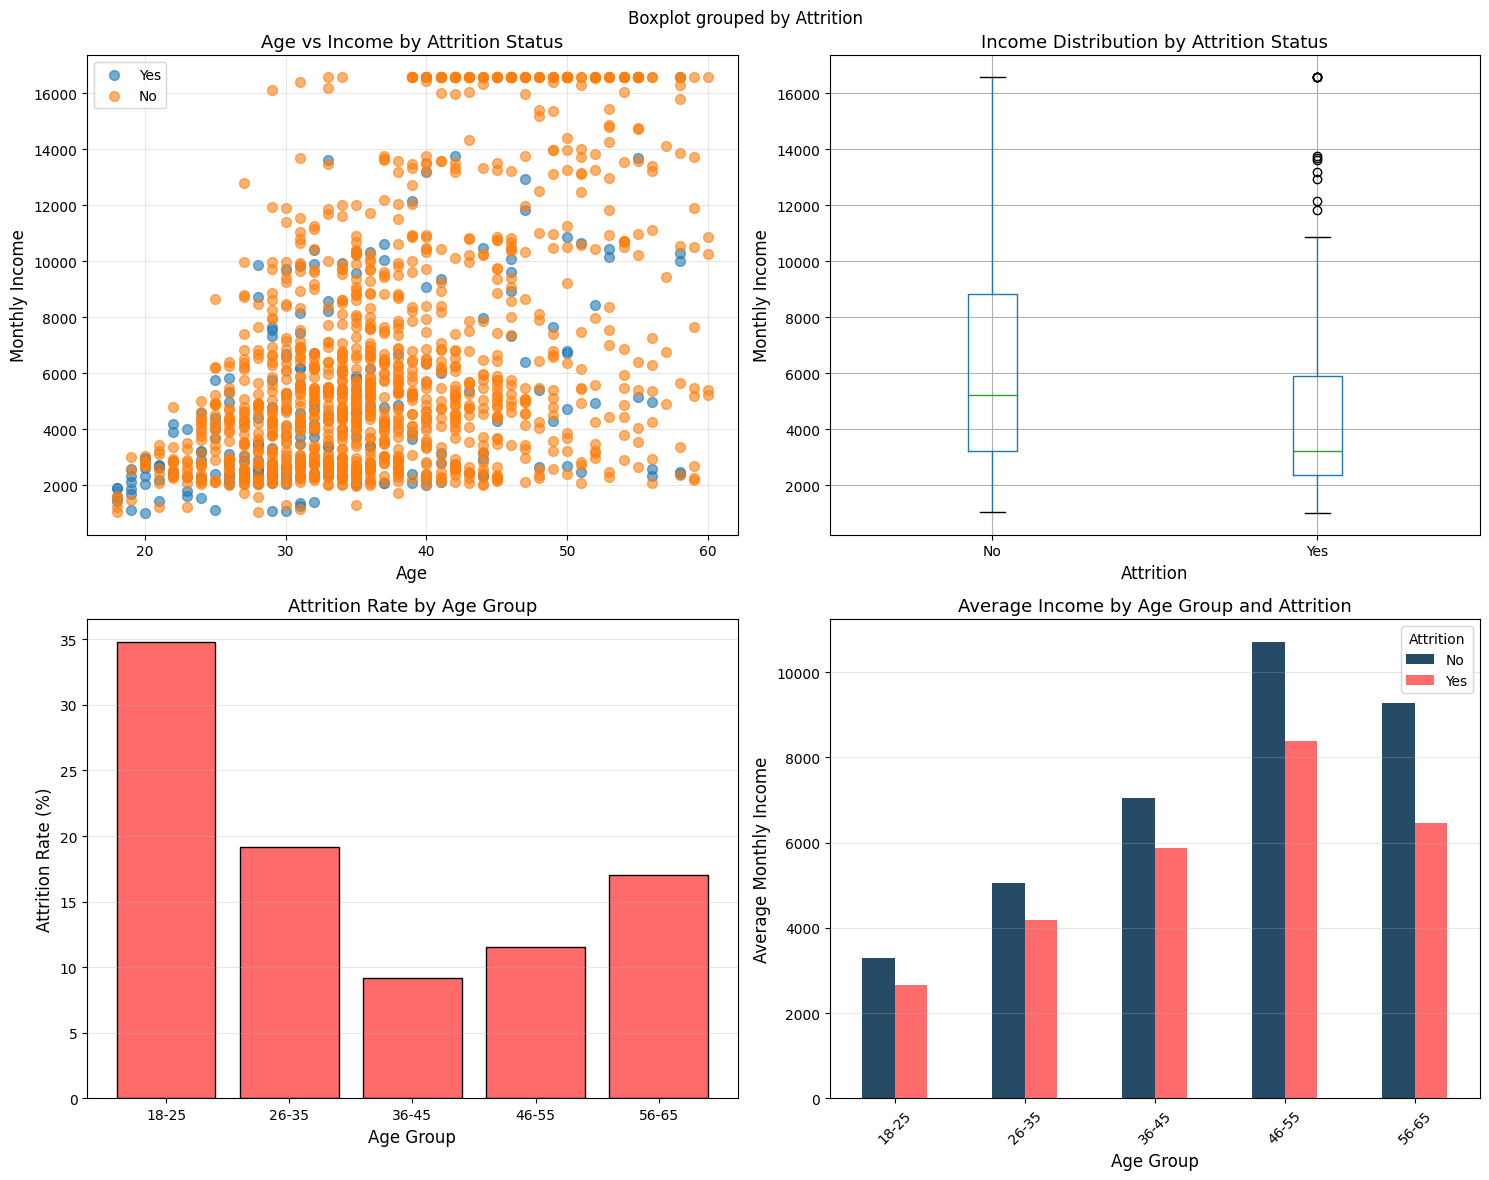


=== Summary Statistics ===

Attrition Rate by Age Group:
  AgeGroup  AttritionRate
0    18-25      34.782609
1    26-35      19.141914
2    36-45       9.188034
3    46-55      11.504425
4    56-65      17.021277


Average Income by Attrition Status:
                  mean  median          std
Attrition                                  
No         6676.280616  5204.0  4444.822596
Yes        4726.274262  3202.0  3409.904624


Average Age by Attrition Status:
                mean  median      std
Attrition                            
No         37.561233    36.0  8.88836
Yes        33.607595    32.0  9.68935


Correlation between Age and Income:
Overall: 0.500
Left: 0.503
Stayed: 0.488


In [35]:

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Do younger employees have lower incomes and higher attrition rates?', 
             fontsize=16, fontweight='bold')

# 1. Scatter plot: Age vs Income colored by Attrition
ax1 = axes[0, 0]
for attrition_status in HR_EDA_clipped['Attrition'].unique():
    mask = HR_EDA_clipped['Attrition'] == attrition_status
    ax1.scatter(HR_EDA_clipped[mask]['Age'], HR_EDA_clipped[mask]['MonthlyIncome'], 
                label=attrition_status, alpha=0.6, s=50)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Monthly Income', fontsize=12)
ax1.set_title('Age vs Income by Attrition Status', fontsize=13)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Box plot: Income distribution by Attrition
ax2 = axes[0, 1]
HR_EDA_clipped.boxplot(column='MonthlyIncome', by='Attrition', ax=ax2)
ax2.set_xlabel('Attrition', fontsize=12)
ax2.set_ylabel('Monthly Income', fontsize=12)
ax2.set_title('Income Distribution by Attrition Status', fontsize=13)
plt.sca(ax2)
plt.xticks(rotation=0)

# 3. Attrition rate by age group
ax3 = axes[1, 0]
HR_EDA_clipped['AgeGroup'] = pd.cut(HR_EDA_clipped['Age'], bins=[18, 25, 35, 45, 55, 65], 
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
attrition_by_age = HR_EDA_clipped.groupby('AgeGroup')['Attrition'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).reset_index()
attrition_by_age.columns = ['AgeGroup', 'AttritionRate']
ax3.bar(attrition_by_age['AgeGroup'], attrition_by_age['AttritionRate'], 
        color='#FF6B6B', edgecolor='black')
ax3.set_xlabel('Age Group', fontsize=12)
ax3.set_ylabel('Attrition Rate (%)', fontsize=12)
ax3.set_title('Attrition Rate by Age Group', fontsize=13)
ax3.grid(True, alpha=0.3, axis='y')

# 4. Average income by age group and attrition
ax4 = axes[1, 1]
income_by_age_attrition = HR_EDA_clipped.groupby(['AgeGroup', 'Attrition'])['MonthlyIncome'].mean().unstack()
income_by_age_attrition.plot(kind='bar', ax=ax4, color=["#254B66", '#FF6B6B'])
ax4.set_xlabel('Age Group', fontsize=12)
ax4.set_ylabel('Average Monthly Income', fontsize=12)
ax4.set_title('Average Income by Age Group and Attrition', fontsize=13)
ax4.legend(title='Attrition')
ax4.grid(True, alpha=0.3, axis='y')
plt.sca(ax4)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== Summary Statistics ===\n")
print("Attrition Rate by Age Group:")
print(attrition_by_age)
print("\n" + "="*50 + "\n")

print("Average Income by Attrition Status:")
print(HR_EDA_clipped.groupby('Attrition')['MonthlyIncome'].agg(['mean', 'median', 'std']))
print("\n" + "="*50 + "\n")

print("Average Age by Attrition Status:")
print(HR_EDA_clipped.groupby('Attrition')['Age'].agg(['mean', 'median', 'std']))
print("\n" + "="*50 + "\n")

# Correlation analysis
print("Correlation between Age and Income:")
print(f"Overall: {HR_EDA_clipped['Age'].corr(HR_EDA_clipped['MonthlyIncome']):.3f}")
print(f"Left: {HR_EDA_clipped[HR_EDA_clipped['Attrition']=='Yes']['Age'].corr(HR_EDA_clipped[HR_EDA_clipped['Attrition']=='Yes']['MonthlyIncome']):.3f}")
print(f"Stayed: {HR_EDA_clipped[HR_EDA_clipped['Attrition']=='No']['Age'].corr(HR_EDA_clipped[HR_EDA_clipped['Attrition']=='No']['MonthlyIncome']):.3f}")

The first graph  shows that employees who left are concentrated more in the lower income ranges (bottom of the scatter).
Younger employees (left side) tend to cluster at lower incomes.
As age increases, income generally increases, but there's a clear income gap between those who stayed and left.
The answer to the question is yes, younger employees (between 18 and 35) are the ones who receive less , and the ones who leave receive less when looking at the average values.

## **5.2. Are younger employees leaving due to limited growth?**

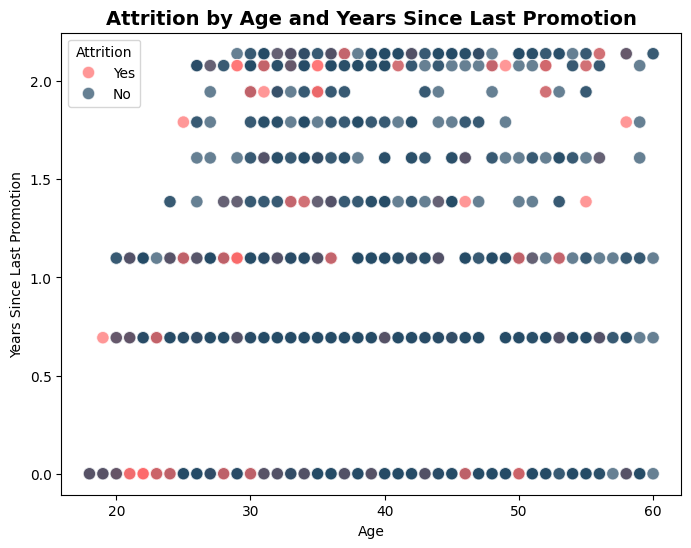

In [36]:


plt.figure(figsize=(8,6))
sns.scatterplot(
    data=HR_EDA_clipped,
    x='Age',
    y='YearsSinceLastPromotionLog',
    hue='Attrition',
    palette={'No':'#254B66','Yes':'#FF6B6B'},
    alpha=0.7,
    s=80
)

plt.title("Attrition by Age and Years Since Last Promotion", fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Years Since Last Promotion")
plt.legend(title="Attrition")
plt.show()


There are many pink dots clustered in the lower band (0-2 years since last promotion). This indicates a higher likelihood of attrition among employees who were recently promoted or have never been promoted. The density of 'No' attrition points still dominates, but the 'Yes' points are very present in this region.
At the top of the chart with more than 10+ years since last promotion, the red/pink dots are sparse. This suggests that employees who have gone a very long time without a promotion are less likely to leave - this also concentrates older people and it is known, from the graphs above that the main workforce are between 20-30 years.

Younger people are more prone to attriction in general, it is natural to have more frequent job changes earlier in the career. Older employyes are generally more stable.
Attrition is common soon after a promotion or with no promotion (0-2 years), suggesting employees may leave quickly if the new role isn't satisfactory or if the lack of promotion is a trigger.

Employees who are older and those who have gone a long time without a promotion are the most likely to stay with the company.

## **5.3. Lower satisfaction is related with higher level of attrition?**

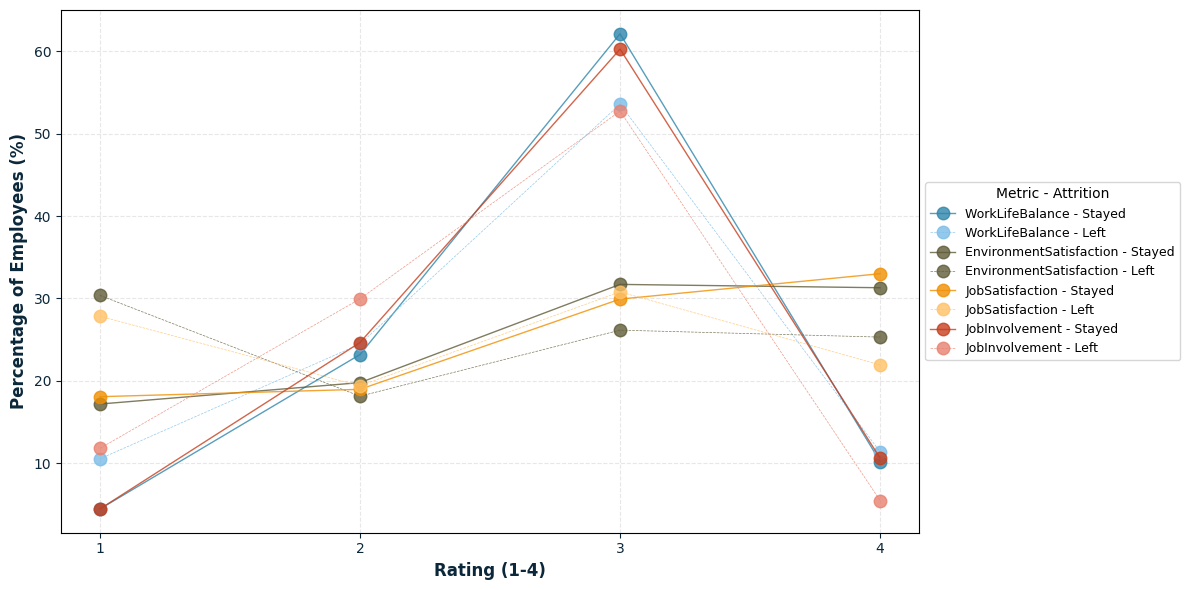

In [37]:
# Define satisfaction variables
satisfaction_vars = ['WorkLifeBalance', 'EnvironmentSatisfaction', 
                     'JobSatisfaction', 'JobInvolvement']

# Create single plot
fig, ax = plt.subplots(figsize=(12, 6))

# Color palette - darker and lighter shades for each feature
feature_colors = {
    'WorkLifeBalance': {'No': '#2E86AB', 'Yes': '#7BBCE8'},
    'EnvironmentSatisfaction': {'No': '#5F5B37', 'Yes': "#5F5B37DF"},
    'JobSatisfaction': {'No': '#F18F01', 'Yes': '#FFC166'},
    'JobInvolvement': {'No': '#C73E1D', 'Yes': '#E8816F'}
}

# Plot lines for each variable and attrition status
for var in satisfaction_vars:
    for attrition in ['No', 'Yes']:
        # Calculate proportions for each rating
        data_subset = HR_EDA_clipped[HR_EDA_clipped['Attrition'] == attrition]
        value_counts = data_subset[var].value_counts().sort_index()
        proportions = value_counts / len(data_subset) * 100
        
        # Plot line with dots
        label = f"{var} - {'Stayed' if attrition == 'No' else 'Left'}"
        linestyle = '-' if attrition == 'No' else '--'
        linewidth = 1 if attrition == 'No' else 0.5
        ax.plot(proportions.index, proportions.values, 
                color=feature_colors[var][attrition],
                linestyle=linestyle,
                linewidth=linewidth,
                marker='o',
                markersize=9,
                label=label,
                alpha=0.8)

# Customize plot
ax.set_xlabel('Rating (1-4)', fontsize=12, color='#0B273A', fontweight='bold')
ax.set_ylabel('Percentage of Employees (%)', fontsize=12, color='#0B273A', fontweight='bold')
ax.set_xticks([1, 2, 3, 4])
ax.tick_params(axis='both', colors='#0B273A', labelsize=10)
ax.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# Add legend outside plot area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), 
          fontsize=9, frameon=True, title='Metric - Attrition',
          title_fontsize=10, ncol=1)

plt.tight_layout()
plt.show()

Continuous lines represents who stayed, the dashed lines who left. When we compare by color and type of line the % is higher for lower ratings, answering to the question with a yes.

10% of the employees who left, had a low worklife balance

30% of the employees who left, had a low environment satisfaction

Around 30% of the employees who left, had weren’t satisfied with their job

Around 10% of the employees who left, had a low job involvement


The following graph presents a clear visualization per variable.

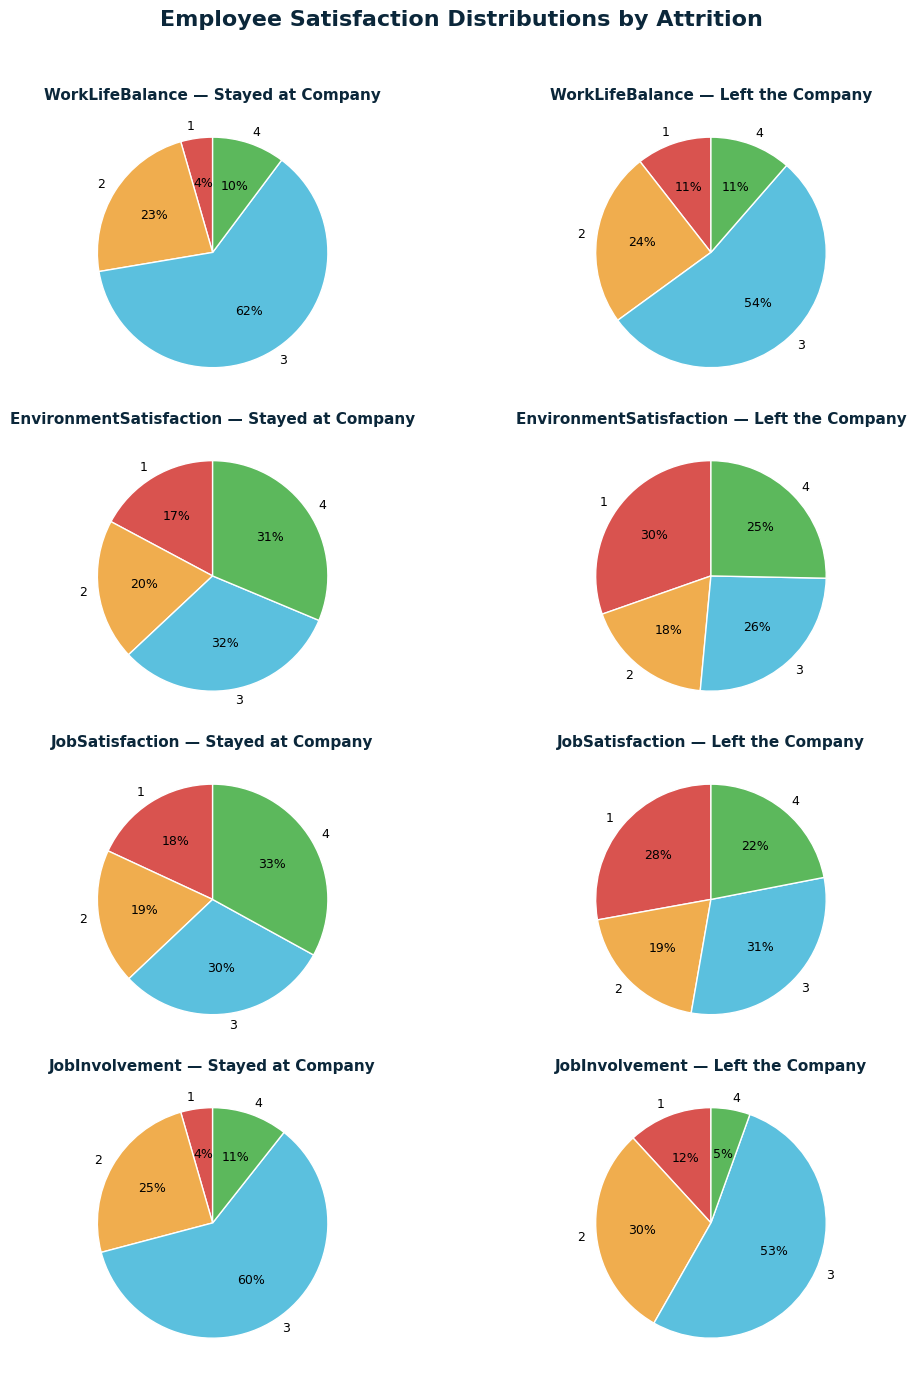

In [38]:
# Satisfaction variables to visualize
satisfaction_vars = ['WorkLifeBalance', 'EnvironmentSatisfaction', 
                     'JobSatisfaction', 'JobInvolvement']

# Consistent color palette for rating levels
rating_colors = {
    1: "#D9534F",   
    2: "#F0AD4E",  
    3: "#5BC0DE", 
    4: "#5CB85C" 
}

# Titles for stakeholders
attrition_labels = {
    'No': "Stayed at Company",
    'Yes': "Left the Company"
}

# Create a dashboard-like figure
fig, axes = plt.subplots(
    nrows=len(satisfaction_vars), 
    ncols=2, 
    figsize=(12, 3.5 * len(satisfaction_vars))
)

fig.suptitle("Employee Satisfaction Distributions by Attrition",
             fontsize=16, fontweight='bold', color="#0B273A", y=0.98)

for i, var in enumerate(satisfaction_vars):
    for j, attrition in enumerate(['No', 'Yes']):
        ax = axes[i, j]

        # Filter data
        data_subset = HR_EDA_clipped[HR_EDA_clipped['Attrition'] == attrition][var]

        # Compute distribution (1–4 scale)
        value_counts = data_subset.value_counts().sort_index()
        
        # Ensure all possible ratings exist
        for rating in [1,2,3,4]:
            if rating not in value_counts.index:
                value_counts.loc[rating] = 0
        value_counts = value_counts.sort_index()

        # Pie chart
        wedges, texts, autotexts = ax.pie(
            value_counts.values,
            labels=[f"{lvl}" for lvl in value_counts.index],
            autopct="%1.0f%%",
            startangle=90,
            colors=[rating_colors[r] for r in value_counts.index],
            textprops={'fontsize': 9},
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
        )

        # Titles
        ax.set_title(
            f"{var} — {attrition_labels[attrition]}",
            fontsize=11, fontweight='bold', color="#0B273A"
        )

# Tight layout for presentation clarity
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [39]:

satisfaction_vars = ['WorkLifeBalance', 'EnvironmentSatisfaction', 
                     'JobSatisfaction', 'JobInvolvement']

# Initialize an empty DataFrame to store the results
probability_df = pd.DataFrame()
totals_df = pd.DataFrame()

# Loop through each satisfaction variable
for var in satisfaction_vars:
    # Calculate the count of employees who stayed ('No') and left ('Yes') for each rating level
    pivot_table = HR_EDA.pivot_table(
        index=var, 
        columns='Attrition', 
        aggfunc='size', 
        fill_value=0
    )
    
    # Ensure both 'No' and 'Yes' columns exist
    if 'Yes' not in pivot_table.columns:
        pivot_table['Yes'] = 0
    if 'No' not in pivot_table.columns:
        pivot_table['No'] = 0
    
    # Calculate the total number of people at that rating level
    pivot_table['Total'] = pivot_table['Yes'] + pivot_table['No']
    
    # Calculate the Conditional Probability (Attrition Rate)
    # P(Attrition='Yes' | Variable=Rating) = Count(Yes) / Total Count
    pivot_table[f'{var}_Attrition_Probability'] = pivot_table['Yes'] / pivot_table['Total']
    
    # Select only the probability column and concatenate it to the results DataFrame
    result_series = pivot_table[f'{var}_Attrition_Probability'].rename(var)
    probability_df = pd.concat([probability_df, result_series], axis=1)
    
    # Store totals for this variable
    totals_series = pivot_table['Total'].rename(f'{var}_Count')
    totals_df = pd.concat([totals_df, totals_series], axis=1)

# Format the probabilities as percentages
probability_df_formatted = probability_df.apply(lambda x: x.map('{:.2%}'.format))

# Combine probabilities and totals
combined_df = pd.concat([probability_df_formatted, totals_df], axis=1)

# Reorder columns to alternate between probability and count for each variable
ordered_cols = []
for var in satisfaction_vars:
    ordered_cols.append(var)
    ordered_cols.append(f'{var}_Count')

combined_df = combined_df[ordered_cols]

combined_df


,WorkLifeBalance,WorkLifeBalance_Count,EnvironmentSatisfaction,EnvironmentSatisfaction_Count,JobSatisfaction,JobSatisfaction_Count,JobInvolvement,JobInvolvement_Count
1,31.25%,80,25.35%,284,22.84%,289,33.73%,83
2,16.86%,344,14.98%,287,16.43%,280,18.93%,375
3,14.22%,893,13.69%,453,16.52%,442,14.40%,868
4,17.65%,153,13.45%,446,11.33%,459,9.03%,144


## **5.4. How do education background and department influence attrition rates?**


Education - Available columns: ['No', 'Yes']
Using col_0 (stayed): No, col_1 (left): Yes

JobLevel - Available columns: ['No', 'Yes']
Using col_0 (stayed): No, col_1 (left): Yes

Department - Available columns: ['No', 'Yes']
Using col_0 (stayed): No, col_1 (left): Yes


=== Attrition Analysis Summary ===

Education:
     Category  Left  Stayed  Total Attrition_Rate
Below College    31     139    170         18.24%
      College    44     238    282         15.60%
     Bachelor    99     473    572         17.31%
       Master    58     340    398         14.57%
       Doctor     5      43     48         10.42%

JobLevel:
         Category  Left  Stayed  Total Attrition_Rate
           HC Rep   143     400    543         26.34%
               HR    52     482    534          9.74%
   Lab Technician    32     186    218         14.68%
          Manager     5     101    106          4.72%
Managing Director     5      64     69          7.25%

Department:
              Category  Left  Sta

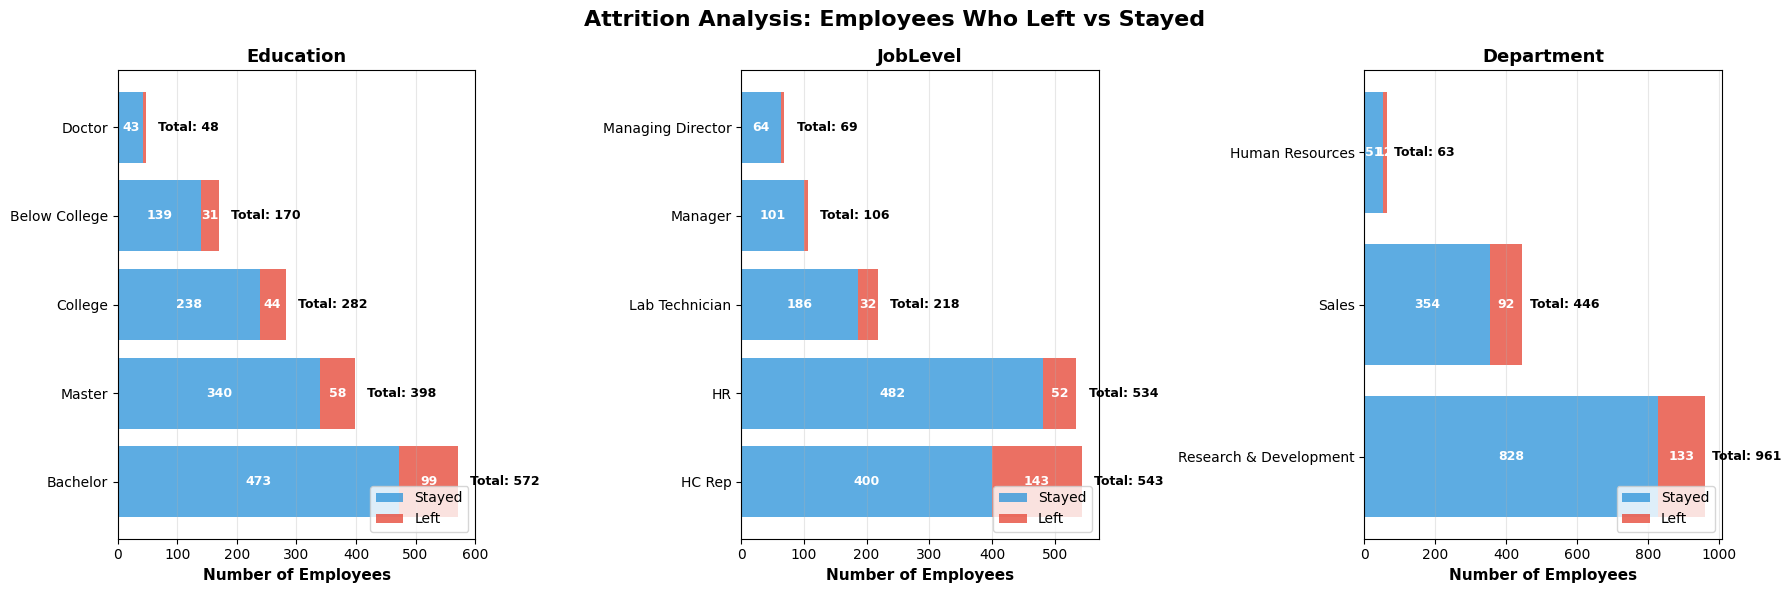

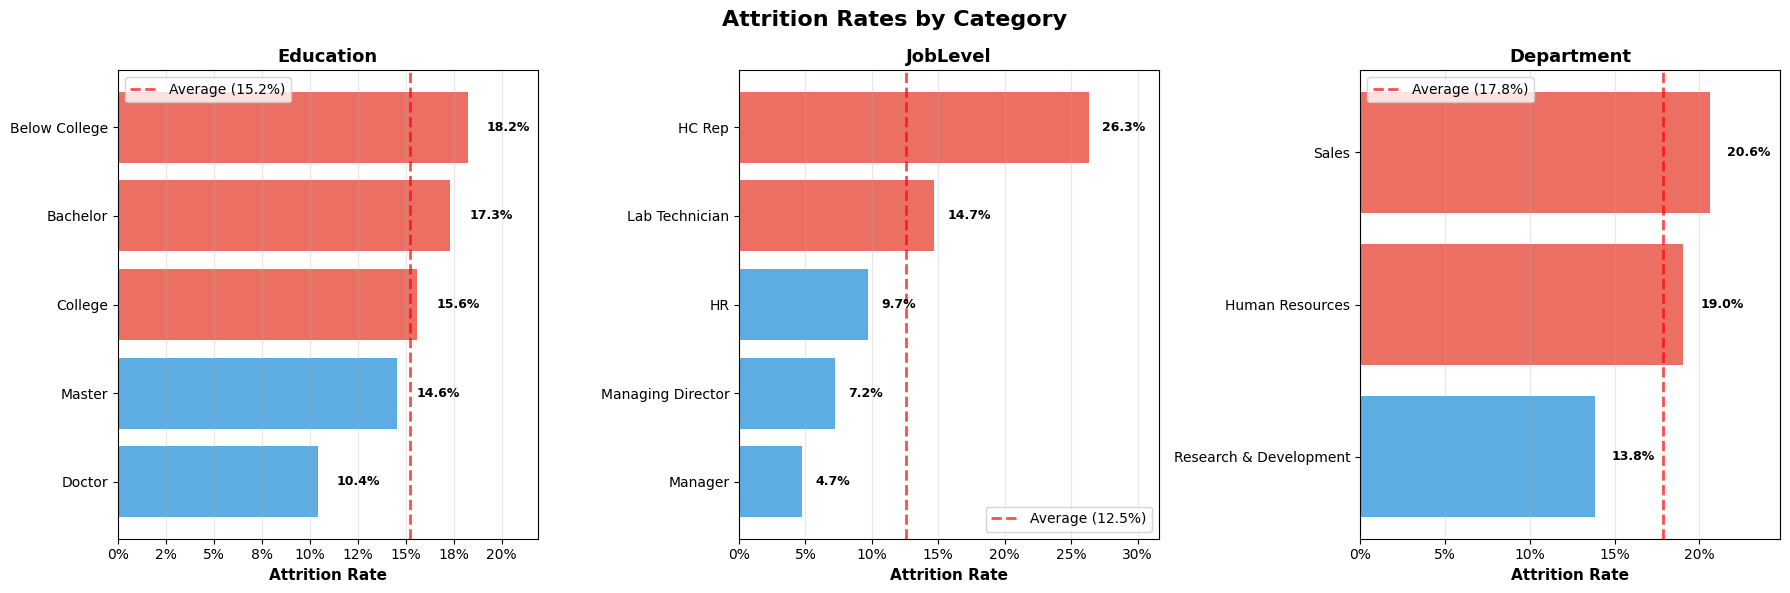

In [40]:


# Define the variables to analyze
education_vars = ['Education', 'JobLevel', 'Department']

# Create mappings for better labels
education_mapping = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

joblevel_mapping = {
    1: 'HC Rep',
    2: 'HR',
    3: 'Lab Technician',
    4: 'Manager',
    5: 'Managing Director',
    6: 'Research Director'
}

# Initialize list to store results
results_data = []

# Loop through each variable
for var in education_vars:
    # Use groupby to count attrition
    grouped = HR_EDA_clipped.groupby([var, 'Attrition']).size().unstack(fill_value=0)
    
    # Get all column names
    cols = grouped.columns.tolist()
    print(f"\n{var} - Available columns: {cols}")
    
    # Find the correct column names - more flexible approach
    col_0 = cols[0] if len(cols) > 0 else None
    col_1 = cols[1] if len(cols) > 1 else None
    
    # Try to identify which is 0 and which is 1
    if col_0 is not None and col_1 is not None:
        # Assume first column is 0 (stayed) and second is 1 (left)
        # But check if they're in reverse order
        if col_0 in [1, 1.0, '1'] or col_1 in [0, 0.0, '0']:
            col_0, col_1 = col_1, col_0  # Swap them
    
    print(f"Using col_0 (stayed): {col_0}, col_1 (left): {col_1}")
    
    if col_0 is None or col_1 is None:
        print(f"WARNING: Could not find both attrition columns for {var}")
        continue
    
    # Calculate totals and rates
    for idx in grouped.index:
        stayed = int(grouped.loc[idx, col_0])
        left = int(grouped.loc[idx, col_1])
        total = left + stayed
        attrition_rate = left / total if total > 0 else 0
        
        label = idx
        if var == 'Education':
            label = education_mapping.get(idx, idx)
        elif var == 'JobLevel':
            label = joblevel_mapping.get(idx, idx)
        
        results_data.append({
            'Variable': var,
            'Category': label,
            'Attrition_Rate': attrition_rate,
            'Left': left,
            'Stayed': stayed,
            'Total': total
        })

# Create DataFrame from results
results_df = pd.DataFrame(results_data)

# Print summary
print("\n\n=== Attrition Analysis Summary ===")
for var in education_vars:
    print(f"\n{var}:")
    var_data = results_df[results_df['Variable'] == var][['Category', 'Left', 'Stayed', 'Total', 'Attrition_Rate']]
    var_data_display = var_data.copy()
    var_data_display['Attrition_Rate'] = var_data_display['Attrition_Rate'].map('{:.2%}'.format)
    print(var_data_display.to_string(index=False))

# Only create visualizations if we have data
if len(results_df) == 0:
    print("\nERROR: No data was processed. Check the column detection logic above.")
else:
    # Create visualizations - Stacked Bar Charts
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Attrition Analysis: Employees Who Left vs Stayed', fontsize=16, fontweight='bold')
    
    # Plot each variable
    for idx, var in enumerate(education_vars):
        var_data = results_df[results_df['Variable'] == var].sort_values('Total', ascending=False)
        
        if len(var_data) == 0:
            continue
            
        ax = axes[idx]
        
        # Create stacked horizontal bar chart
        categories = var_data['Category']
        stayed = var_data['Stayed']
        left = var_data['Left']
        
        bars1 = ax.barh(categories, stayed, label='Stayed', color='#3498db', alpha=0.8)
        bars2 = ax.barh(categories, left, left=stayed, label='Left', color='#e74c3c', alpha=0.8)
        
        ax.set_xlabel('Number of Employees', fontweight='bold', fontsize=11)
        ax.set_title(f'{var}', fontweight='bold', fontsize=13)
        ax.legend(loc='lower right')
        ax.grid(axis='x', alpha=0.3)
        
        # Add count labels
        for i, (cat, s, l) in enumerate(zip(categories, stayed, left)):
            # Label for stayed
            if s > 20:
                ax.text(s/2, i, f'{s}', ha='center', va='center', 
                       fontsize=9, fontweight='bold', color='white')
            # Label for left
            if l > 10:
                ax.text(s + l/2, i, f'{l}', ha='center', va='center', 
                       fontsize=9, fontweight='bold', color='white')
            # Total on the right
            ax.text(s + l + 20, i, f'Total: {s+l}', ha='left', va='center', 
                   fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Create attrition rate comparison
    fig2, axes2 = plt.subplots(1, 3, figsize=(18, 6))
    fig2.suptitle('Attrition Rates by Category', fontsize=16, fontweight='bold')
    
    for idx, var in enumerate(education_vars):
        var_data = results_df[results_df['Variable'] == var].sort_values('Attrition_Rate', ascending=True)
        
        if len(var_data) == 0:
            continue
            
        ax = axes2[idx]
        avg_rate = var_data['Attrition_Rate'].mean()
        colors = ['#e74c3c' if x > avg_rate else '#3498db' for x in var_data['Attrition_Rate']]
        
        bars = ax.barh(var_data['Category'], var_data['Attrition_Rate'], color=colors, alpha=0.8)
        ax.axvline(x=avg_rate, color='red', linestyle='--', linewidth=2, 
                  label=f'Average ({avg_rate:.1%})', alpha=0.7)
        ax.set_xlabel('Attrition Rate', fontweight='bold', fontsize=11)
        ax.set_title(f'{var}', fontweight='bold', fontsize=13)
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
        ax.legend()
        ax.grid(axis='x', alpha=0.3)
        ax.set_xlim(0, max(var_data['Attrition_Rate']) * 1.2)
        
        # Add percentage labels
        for bar in bars:
            width = bar.get_width()
            ax.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.1%}', 
                   ha='left', va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

=== DATA QUALITY CHECK ===
Total rows after cleaning: 1470
Attrition value counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


=== COMBINED ANALYSIS: Education + Department ===

Top 10 Profiles with Highest Attrition (Education + Department):
Education_Label             Department  Stayed  Left  Total Attrition_Rate
       Bachelor                  Sales     127    39    166          23.5%
        College        Human Resources      10     3     13          23.1%
  Below College                  Sales      39    11     50          22.0%
        College                  Sales      69    18     87          20.7%
         Master        Human Resources      12     3     15          20.0%
         Master                  Sales     105    23    128          18.0%
  Below College Research & Development      96    19    115          16.5%
       Bachelor        Human Resources      23     4     27          14.8%
       Bachelor Research & Development     323    56    379     

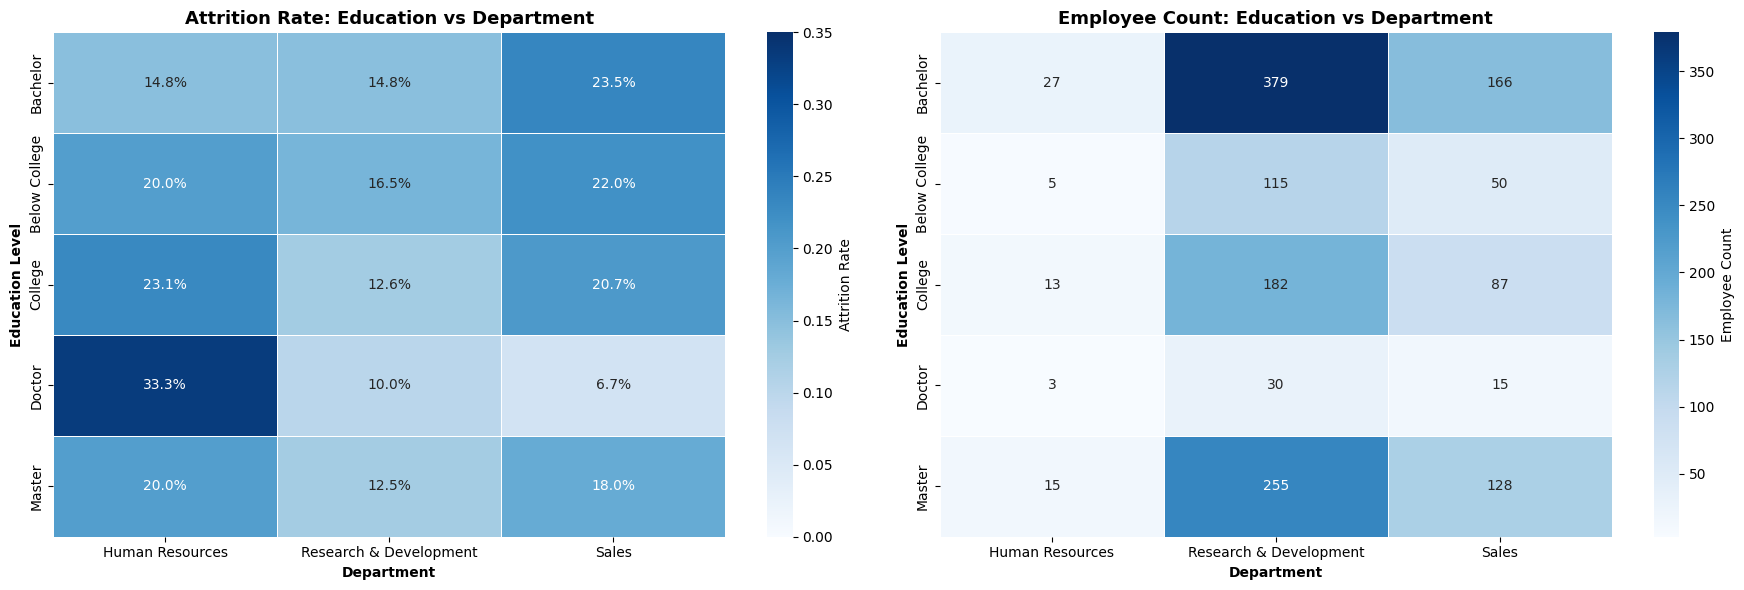

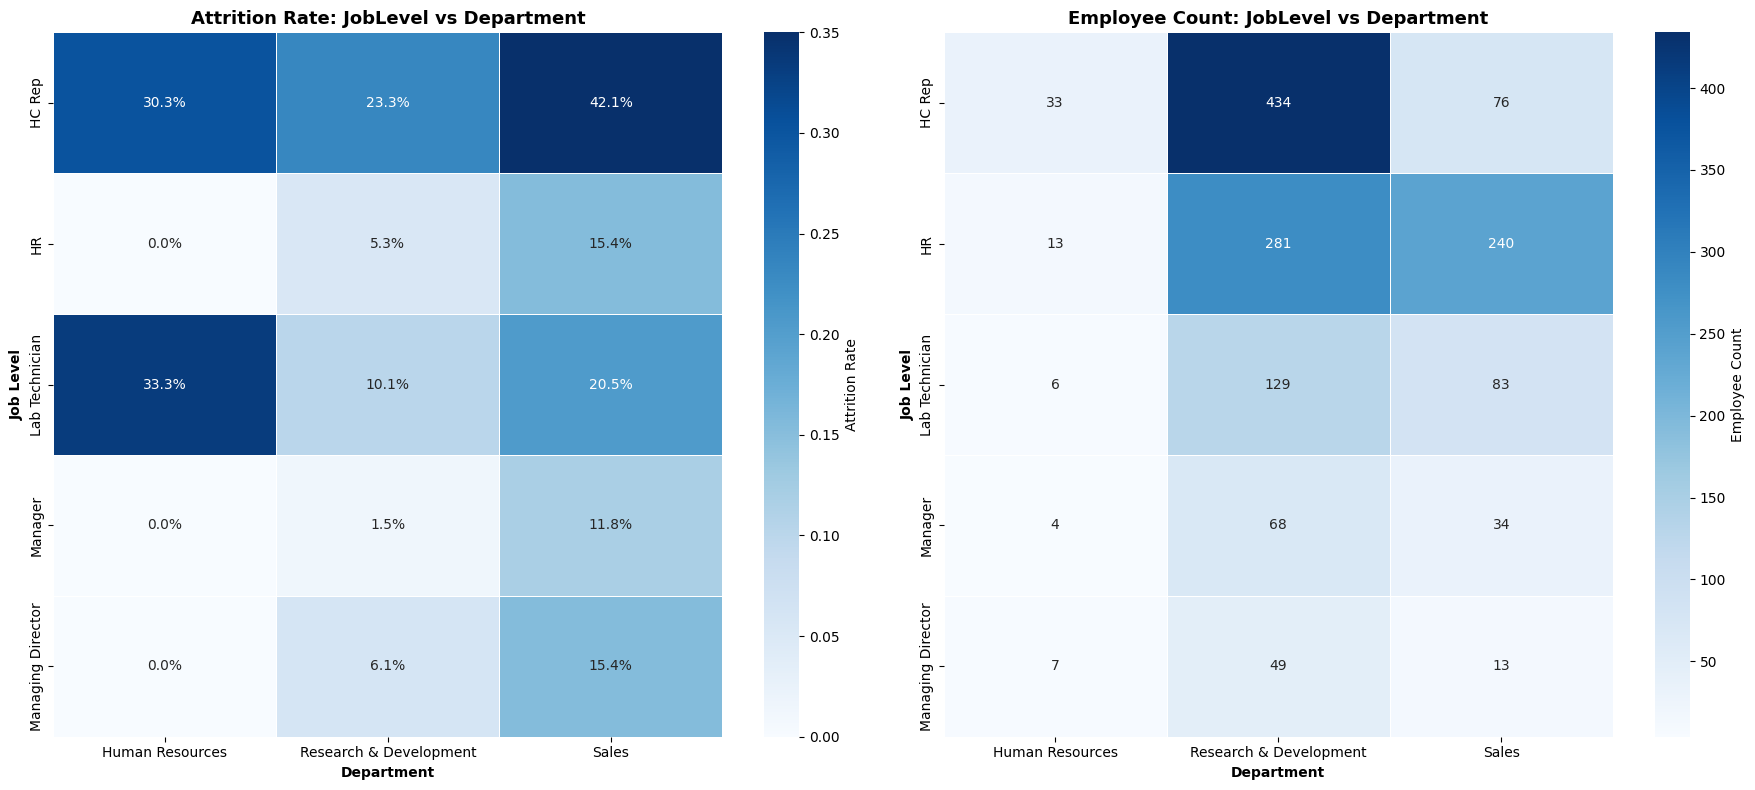

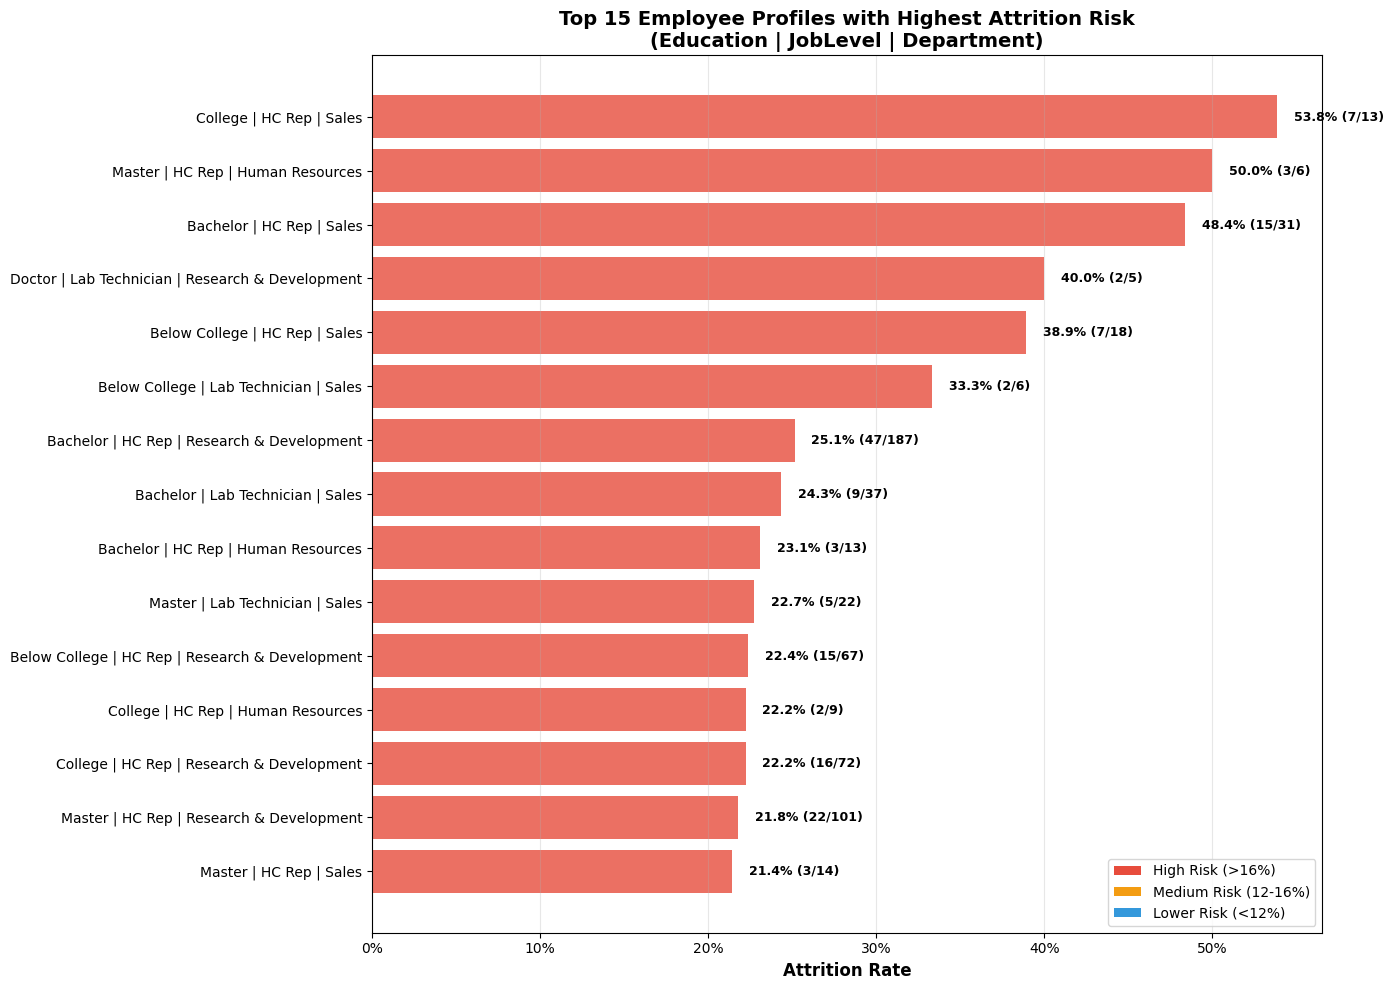



=== OVERALL SUMMARY ===
Total Employees: 1470
Total Attrition: 237 (16.1%)

Highest Risk Profile: College | HC Rep | Sales
  - Attrition Rate: 53.8%
  - Total Employees: 13
  - Left: 7


In [41]:


# Create mappings for better labels
education_mapping = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

joblevel_mapping = {
    1: 'HC Rep',
    2: 'HR',
    3: 'Lab Technician',
    4: 'Manager',
    5: 'Managing Director',
    6: 'Research Director'
}

# Create readable labels in the dataframe
HR_analysis = HR_EDA_clipped.copy()
HR_analysis['Education_Label'] = HR_analysis['Education'].map(education_mapping)
HR_analysis['JobLevel_Label'] = HR_analysis['JobLevel'].map(joblevel_mapping)

# Remove any rows with missing labels
HR_analysis = HR_analysis.dropna(subset=['Education_Label', 'JobLevel_Label', 'Department'])

print("=== DATA QUALITY CHECK ===")
print(f"Total rows after cleaning: {len(HR_analysis)}")
print(f"Attrition value counts:\n{HR_analysis['Attrition'].value_counts()}")

# 1. COMBINED ANALYSIS: Education + Department
print("\n\n=== COMBINED ANALYSIS: Education + Department ===")
edu_dept_summary = []

for (edu, dept), group in HR_analysis.groupby(['Education_Label', 'Department']):
    stayed = int((group['Attrition'] == 'No').sum())
    left = int((group['Attrition'] == 'Yes').sum())
    total = len(group)
    attrition_rate = left / total if total > 0 else 0
    
    edu_dept_summary.append({
        'Education_Label': edu,
        'Department': dept,
        'Stayed': stayed,
        'Left': left,
        'Total': total,
        'Attrition_Rate': attrition_rate
    })

edu_dept_df = pd.DataFrame(edu_dept_summary)
edu_dept_sorted = edu_dept_df[edu_dept_df['Total'] >= 10].sort_values('Attrition_Rate', ascending=False)

print("\nTop 10 Profiles with Highest Attrition (Education + Department):")
display_df = edu_dept_sorted[['Education_Label', 'Department', 'Stayed', 'Left', 'Total', 'Attrition_Rate']].head(10).copy()
display_df['Attrition_Rate'] = display_df['Attrition_Rate'].map('{:.1%}'.format)
print(display_df.to_string(index=False))

# 2. COMBINED ANALYSIS: JobLevel + Department
print("\n\n=== COMBINED ANALYSIS: JobLevel + Department ===")
job_dept_summary = []

for (job, dept), group in HR_analysis.groupby(['JobLevel_Label', 'Department']):
    stayed = int((group['Attrition'] == 'No').sum())
    left = int((group['Attrition'] == 'Yes').sum())
    total = len(group)
    attrition_rate = left / total if total > 0 else 0
    
    job_dept_summary.append({
        'JobLevel_Label': job,
        'Department': dept,
        'Stayed': stayed,
        'Left': left,
        'Total': total,
        'Attrition_Rate': attrition_rate
    })

job_dept_df = pd.DataFrame(job_dept_summary)
job_dept_sorted = job_dept_df[job_dept_df['Total'] >= 10].sort_values('Attrition_Rate', ascending=False)

print("\nTop 10 Profiles with Highest Attrition (JobLevel + Department):")
display_df = job_dept_sorted[['JobLevel_Label', 'Department', 'Stayed', 'Left', 'Total', 'Attrition_Rate']].head(10).copy()
display_df['Attrition_Rate'] = display_df['Attrition_Rate'].map('{:.1%}'.format)
print(display_df.to_string(index=False))

# 3. COMBINED ANALYSIS: Education + JobLevel + Department
print("\n\n=== COMBINED ANALYSIS: Education + JobLevel + Department ===")
all_summary = []

for (edu, job, dept), group in HR_analysis.groupby(['Education_Label', 'JobLevel_Label', 'Department']):
    stayed = int((group['Attrition'] == 'No').sum())
    left = int((group['Attrition'] == 'Yes').sum())
    total = len(group)
    attrition_rate = left / total if total > 0 else 0
    
    all_summary.append({
        'Education_Label': edu,
        'JobLevel_Label': job,
        'Department': dept,
        'Stayed': stayed,
        'Left': left,
        'Total': total,
        'Attrition_Rate': attrition_rate
    })

all_df = pd.DataFrame(all_summary)
all_sorted = all_df[all_df['Total'] >= 5].sort_values('Attrition_Rate', ascending=False)

print("\nTop 15 Profiles with Highest Attrition (Education + JobLevel + Department):")
display_df = all_sorted[['Education_Label', 'JobLevel_Label', 'Department', 'Stayed', 'Left', 'Total', 'Attrition_Rate']].head(15).copy()
display_df['Attrition_Rate'] = display_df['Attrition_Rate'].map('{:.1%}'.format)
print(display_df.to_string(index=False))

# VISUALIZATION 1: Heatmap of Education vs Department
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Create pivot for attrition rate
pivot_rate = edu_dept_df.pivot(index='Education_Label', columns='Department', values='Attrition_Rate')
pivot_rate = pivot_rate.fillna(0)

# Create pivot for counts
pivot_count = edu_dept_df.pivot(index='Education_Label', columns='Department', values='Total')
pivot_count = pivot_count.fillna(0)

# Attrition Rate Heatmap
sns.heatmap(pivot_rate, annot=True, fmt='.1%', cmap='Blues', ax=axes[0], 
            cbar_kws={'label': 'Attrition Rate'}, vmin=0, vmax=0.35, linewidths=0.5)
axes[0].set_title('Attrition Rate: Education vs Department', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Department', fontweight='bold')
axes[0].set_ylabel('Education Level', fontweight='bold')

# Count Heatmap
sns.heatmap(pivot_count, annot=True, fmt='.0f', cmap='Blues', ax=axes[1], 
            cbar_kws={'label': 'Employee Count'}, linewidths=0.5)
axes[1].set_title('Employee Count: Education vs Department', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Department', fontweight='bold')
axes[1].set_ylabel('Education Level', fontweight='bold')

plt.tight_layout()
plt.show()

# VISUALIZATION 2: Heatmap of JobLevel vs Department
fig2, axes2 = plt.subplots(1, 2, figsize=(18, 8))

# Create pivot for attrition rate
pivot_rate2 = job_dept_df.pivot(index='JobLevel_Label', columns='Department', values='Attrition_Rate')
pivot_rate2 = pivot_rate2.fillna(0)

# Create pivot for counts
pivot_count2 = job_dept_df.pivot(index='JobLevel_Label', columns='Department', values='Total')
pivot_count2 = pivot_count2.fillna(0)

# Attrition Rate Heatmap
sns.heatmap(pivot_rate2, annot=True, fmt='.1%', cmap='Blues', ax=axes2[0], 
            cbar_kws={'label': 'Attrition Rate'}, vmin=0, vmax=0.35, linewidths=0.5)
axes2[0].set_title('Attrition Rate: JobLevel vs Department', fontweight='bold', fontsize=13)
axes2[0].set_xlabel('Department', fontweight='bold')
axes2[0].set_ylabel('Job Level', fontweight='bold')

# Count Heatmap
sns.heatmap(pivot_count2, annot=True, fmt='.0f', cmap='Blues', ax=axes2[1], 
            cbar_kws={'label': 'Employee Count'}, linewidths=0.5)
axes2[1].set_title('Employee Count: JobLevel vs Department', fontweight='bold', fontsize=13)
axes2[1].set_xlabel('Department', fontweight='bold')
axes2[1].set_ylabel('Job Level', fontweight='bold')

plt.tight_layout()
plt.show()

# VISUALIZATION 3: Top profiles with highest attrition
fig3, ax3 = plt.subplots(figsize=(14, 10))

# Get top 15 combinations
top_profiles = all_sorted.head(15).copy()
top_profiles['Profile'] = (top_profiles['Education_Label'] + ' | ' + 
                            top_profiles['JobLevel_Label'] + ' | ' + 
                            top_profiles['Department'])

colors = ['#e74c3c' if x > 0.16 else '#f39c12' if x > 0.12 else '#3498db' 
          for x in top_profiles['Attrition_Rate']]

bars = ax3.barh(range(len(top_profiles)), top_profiles['Attrition_Rate'], color=colors, alpha=0.8)
ax3.set_yticks(range(len(top_profiles)))
ax3.set_yticklabels(top_profiles['Profile'])
ax3.set_xlabel('Attrition Rate', fontweight='bold', fontsize=12)
ax3.set_title('Top 15 Employee Profiles with Highest Attrition Risk\n(Education | JobLevel | Department)', 
              fontweight='bold', fontsize=14)
ax3.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax3.grid(axis='x', alpha=0.3)
ax3.invert_yaxis()  # Highest at top

# Add labels
for i, (rate, total, left) in enumerate(zip(top_profiles['Attrition_Rate'], 
                                              top_profiles['Total'], 
                                              top_profiles['Left'])):
    ax3.text(rate + 0.01, i, f'{rate:.1%} ({int(left)}/{int(total)})', 
            va='center', fontsize=9, fontweight='bold')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#e74c3c', label='High Risk (>16%)'),
                   Patch(facecolor='#f39c12', label='Medium Risk (12-16%)'),
                   Patch(facecolor='#3498db', label='Lower Risk (<12%)')]
ax3.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n\n=== OVERALL SUMMARY ===")
print(f"Total Employees: {len(HR_analysis)}")
print(f"Total Attrition: {(HR_analysis['Attrition'] == 'Yes').sum()} ({(HR_analysis['Attrition'] == 'Yes').sum() / len(HR_analysis):.1%})")
print(f"\nHighest Risk Profile: {top_profiles.iloc[0]['Profile']}")
print(f"  - Attrition Rate: {top_profiles.iloc[0]['Attrition_Rate']:.1%}")
print(f"  - Total Employees: {int(top_profiles.iloc[0]['Total'])}")
print(f"  - Left: {int(top_profiles.iloc[0]['Left'])}")

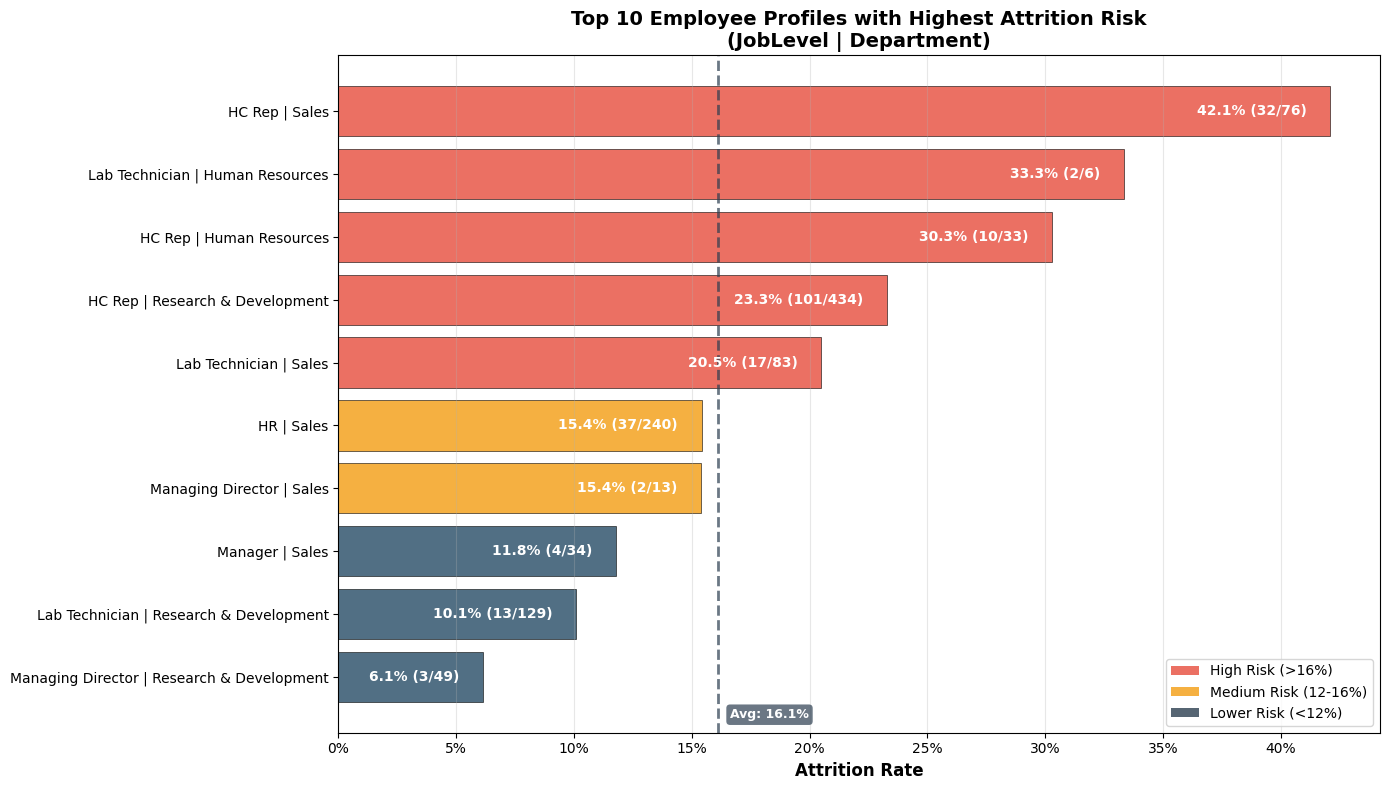

=== TOP 10 PROFILES: JobLevel + Department ===
         JobLevel             Department  Stayed  Left  Total Attrition_Rate
           HC Rep                  Sales      44    32     76          42.1%
   Lab Technician        Human Resources       4     2      6          33.3%
           HC Rep        Human Resources      23    10     33          30.3%
           HC Rep Research & Development     333   101    434          23.3%
   Lab Technician                  Sales      66    17     83          20.5%
               HR                  Sales     203    37    240          15.4%
Managing Director                  Sales      11     2     13          15.4%
          Manager                  Sales      30     4     34          11.8%
   Lab Technician Research & Development     116    13    129          10.1%
Managing Director Research & Development      46     3     49           6.1%

=== OVERALL STATISTICS ===
Overall Attrition Rate: 16.1%
Highest Risk Profile: HC Rep | Sales
  - Attriti

In [42]:

# Create mappings for better labels
joblevel_mapping = {
    1: 'HC Rep',
    2: 'HR',
    3: 'Lab Technician',
    4: 'Manager',
    5: 'Managing Director',
    6: 'Research Director'
}

# Create readable labels in the dataframe
HR_analysis = HR_EDA_clipped.copy()
HR_analysis['JobLevel_Label'] = HR_analysis['JobLevel'].map(joblevel_mapping)

# Calculate attrition for JobLevel + Department combinations
job_dept_summary = []

for (job, dept), group in HR_analysis.groupby(['JobLevel_Label', 'Department']):
    stayed = int((group['Attrition'] == 'No').sum())
    left = int((group['Attrition'] == 'Yes').sum())
    total = len(group)
    attrition_rate = left / total if total > 0 else 0
    
    job_dept_summary.append({
        'JobLevel': job,
        'Department': dept,
        'Stayed': stayed,
        'Left': left,
        'Total': total,
        'Attrition_Rate': attrition_rate
    })

job_dept_df = pd.DataFrame(job_dept_summary)

# Filter for profiles with at least 5 employees and sort by attrition rate
job_dept_filtered = job_dept_df[job_dept_df['Total'] >= 5].sort_values('Attrition_Rate', ascending=False)

# Get top 10
top_10 = job_dept_filtered.head(10).copy()
top_10['Profile'] = top_10['JobLevel'] + ' | ' + top_10['Department']

# Calculate overall average
overall_avg = (HR_analysis['Attrition'] == 'Yes').sum() / len(HR_analysis)

# Create colors based on risk level
colors = []
for rate in top_10['Attrition_Rate']:
    if rate > 0.16:
        colors.append('#e74c3c')  # High risk
    elif rate > 0.12:
        colors.append('#f39c12')  # Medium risk
    else:
        colors.append('#254B66')  # Lower risk

# VISUALIZATION
fig, ax = plt.subplots(figsize=(14, 8))

# Create horizontal bars
bars = ax.barh(range(len(top_10)), top_10['Attrition_Rate'], color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)

# Formatting
ax.set_yticks(range(len(top_10)))
ax.set_yticklabels(top_10['Profile'])
ax.set_xlabel('Attrition Rate', fontweight='bold', fontsize=12)
ax.set_title('Top 10 Employee Profiles with Highest Attrition Risk\n(JobLevel | Department)', 
             fontweight='bold', fontsize=14)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()  # Highest at top

# Add average line
ax.axvline(x=overall_avg, color='#2c3e50', linestyle='--', linewidth=2, alpha=0.7)

# Add value labels INSIDE bars, aligned to the right
for i, (rate, total, left) in enumerate(zip(top_10['Attrition_Rate'], 
                                              top_10['Total'], 
                                              top_10['Left'])):
    # Main percentage and count
    label_text = f'{rate:.1%} ({int(left)}/{int(total)})'
    
    # Position text at the right edge of the bar (with small padding)
    x_position = rate - 0.01  # Small padding from the right edge
    
    ax.text(x_position, i, label_text, 
            va='center', ha='right', fontsize=10, fontweight='bold', color='white')

# Add text annotation for average line
ax.text(overall_avg + 0.005, len(top_10) - 0.5, f'Avg: {overall_avg:.1%}', 
        rotation=0, va='top', ha='left', fontsize=9, 
        bbox=dict(boxstyle='round,pad=0.3', facecolor='#2c3e50', alpha=0.7, edgecolor='none'),
        color='white', fontweight='bold')

# Add legend outside
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#e74c3c', label='High Risk (>16%)', alpha=0.8),
    Patch(facecolor='#f39c12', label='Medium Risk (12-16%)', alpha=0.8),
    Patch(facecolor='#2c3e50', label='Lower Risk (<12%)', alpha=0.8),
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary table
print("=== TOP 10 PROFILES: JobLevel + Department ===")
display_df = top_10[['JobLevel', 'Department', 'Stayed', 'Left', 'Total', 'Attrition_Rate']].copy()
display_df['Attrition_Rate'] = display_df['Attrition_Rate'].map('{:.1%}'.format)
print(display_df.to_string(index=False))

print(f"\n=== OVERALL STATISTICS ===")
print(f"Overall Attrition Rate: {overall_avg:.1%}")
print(f"Highest Risk Profile: {top_10.iloc[0]['Profile']}")
print(f"  - Attrition Rate: {top_10.iloc[0]['Attrition_Rate']:.1%}")
print(f"  - Employees: {int(top_10.iloc[0]['Total'])} (Left: {int(top_10.iloc[0]['Left'])})")

# **6. Scaling and Encoding**

At this stage, both numerical and categorical features need to be treated.

On one hand, the **numerical features** need to be **scaled**. It is important to note that in this dataset, some numerical variables are actually **ordinal categorical features**, where numbers represent ordered categories. However, since the scale logic is consistent across the dataset, this transformation can be applied directly. For example, the Work-Life Balance variable is rated on a scale from 1 to 4, where 1 represents “Bad” and 4 represents “Best.” The Performance Rating feature follows the same structure, ranging from 1 (“Low”) to 4 (“Outstanding”).

Scaling is essential to prevent features with larger numerical ranges from dominating others, and it helps models such as Linear Regression and K-Nearest Neighbors converge more efficiently and accurately, leading to improved performance. In this project, the `MinMaxScaler()` was used, normalizing all variables to a range between 0 and 1.

On the other hand, **categorical features** must be **encoded** and converted into numerical representations so that machine learning algorithms can process and interpret them effectively.

The output was saved just for reference, since the Preprocessing script will handle the values for the models. 

## **6.1. Numerical features - Applying Scaler**

In [43]:

HR_EDA_1 = HR_EDA_clipped.copy()

# Seleciona apenas colunas numéricas (int64, float64)
numeric_cols = HR_EDA_1.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
HR_EDA_1[numeric_cols] = scaler.fit_transform(HR_EDA_1[numeric_cols])

HR_EDA_1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeLog,TotalWorkingYearsLog,YearsAtCompanyLog,YearsSinceLastPromotionLog,AgeGroup
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.547619,Yes,Travel_Rarely,0.715820,Sales,0.000000,0.25,Life Sciences,0.333333,Female,0.914286,0.666667,0.25,Sales Executive,1.000000,Single,0.320062,0.698053,0.933333,Yes,0.000000,0.0,0.000000,0.000000,0.280702,0.000,0.000000,0.333333,0.275862,0.000000,0.344828,0.636374,0.649223,0.660876,0.000000,36-45
2,0.738095,No,Travel_Frequently,0.126700,Research & Development,0.250000,0.00,Life Sciences,0.666667,Male,0.442857,0.333333,0.25,Research Scientist,0.333333,Married,0.264642,0.916001,0.000000,No,0.857143,1.0,1.000000,0.333333,0.350877,0.625,0.666667,0.555556,0.482759,0.133333,0.482759,0.580821,0.708516,0.814381,0.323891,46-55
4,0.452381,Yes,Travel_Rarely,0.909807,Research & Development,0.035714,0.25,Other,1.000000,Male,0.885714,0.333333,0.00,Laboratory Technician,0.666667,Single,0.069419,0.012126,0.666667,Yes,0.285714,0.0,0.333333,0.000000,0.245614,0.625,0.666667,0.000000,0.000000,0.000000,0.000000,0.260042,0.614421,0.000000,0.000000,36-45
5,0.357143,No,Travel_Frequently,0.923407,Research & Development,0.071429,0.75,Life Sciences,1.000000,Female,0.371429,0.666667,0.00,Research Scientist,0.666667,Married,0.122014,0.845814,0.000000,Yes,0.000000,0.0,0.666667,0.000000,0.280702,0.625,0.666667,0.444444,0.482759,0.400000,0.000000,0.378150,0.649223,0.746229,0.647781,26-35
7,0.214286,No,Travel_Rarely,0.350036,Research & Development,0.035714,0.00,Medical,0.000000,Male,0.142857,0.666667,0.00,Laboratory Technician,0.333333,Married,0.157912,0.583738,1.000000,No,0.071429,0.0,1.000000,0.333333,0.210526,0.625,0.666667,0.111111,0.137931,0.266667,0.137931,0.440941,0.574966,0.373114,0.513354,26-35


## **6.2. Categorical features - Applying encoding**

Due to the nature of the problem and the characteristics of features, the encoding needs to be performed case by case. 

- Department and job roles - any option is dropped
- Education Field - drop the other option 
- BusinessTravel, Gender, MaritalStatus,  OverTime
- Attrition mapped as binary

In [44]:
# Department: do not drop any category
HR_1_1 = pd.get_dummies(HR_EDA_clipped, columns=['Department'], drop_first=False)

# EducationField: drop only 'Other'
edu_dummies = pd.get_dummies(HR_1_1['EducationField'], prefix='EducationField')
edu_dummies = edu_dummies.drop('EducationField_Other', axis=1)
HR_1_1 = pd.concat([HR_1_1.drop('EducationField', axis=1), edu_dummies], axis=1)

# JobRole: do not drop any category
HR_1_1 = pd.get_dummies(HR_1_1, columns=['JobRole'], drop_first=False)

# For the remaining categorical variables, drop first as before
HR_1_1 = pd.get_dummies(
    HR_1_1,
    columns=['BusinessTravel', 'Gender', 'MaritalStatus', 'OverTime'],
    drop_first=True
)

# Encode the target variable 'Attrition' as binary
HR_1_1['Attrition'] = HR_1_1['Attrition'].map({'Yes': 1, 'No': 0})

HR_1_1.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeLog,TotalWorkingYearsLog,YearsAtCompanyLog,YearsSinceLastPromotionLog,AgeGroup,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1102,1,2,2,94,3,2,4,5993,19479,8.0,11,3,1,0,8.0,0.5,1,6,4.0,0.0,5.0,8.698514,2.197225,1.945910,0.000000,36-45,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True
2,49,0,279,8,1,3,61,2,2,2,5130,24907,1.0,23,4,4,1,10.0,3.0,3,10,7.0,1.0,7.0,8.543056,2.397895,2.397895,0.693147,46-55,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False
4,37,1,1373,2,2,4,92,2,1,3,2090,2396,6.0,15,3,2,0,7.0,3.0,3,0,0.0,0.0,0.0,7.645398,2.079442,0.000000,0.000000,36-45,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,True,True
5,33,0,1392,3,4,4,56,3,1,3,2909,23159,1.0,11,3,3,0,8.0,3.0,3,8,7.0,3.0,0.0,7.975908,2.197225,2.197225,1.386294,26-35,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True
7,27,0,591,2,1,1,40,3,1,2,3468,16632,8.5,12,3,4,1,6.0,3.0,3,2,2.0,2.0,2.0,8.151622,1.945910,1.098612,1.098612,26-35,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False


## **Result dataframe: HR_1_1**

In [46]:
# Save the resulting dataframe (already has the variables encoded)
processed_dir = project_root / "data" / "processed"
processed_dir.mkdir(parents=True, exist_ok=True)
output_path = processed_dir / "HR_1_1.csv"
HR_1_1.to_csv(output_path, index=False)
print(f"Saved HR_1_1 to: {output_path}")


Saved HR_1_1 to: c:\Users\Utilizador\EDSA\EDSB25_10\data\processed\HR_1_1.csv
